In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pandas.plotting import autocorrelation_plot
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import os

In [2]:
ROADS_1 = ['A. Maceda', 'Anda Circle', 'Antipolo',
         'Bluementritt', 'Buendia', 'Edsa Extension', 'Finance Road', 
         'Gov. Forbes - Lacson', 'Lerma', 'Magsaysay Ave', 'P.Noval', 'Pablo Ocampo', 'Pedro Gil', 
         'Quezon Ave.', 'Quirino', 'Rajah Sulayman', 'Taft Ave.', 'U.N. Avenue',
         'Vicente Cruz']

YEAR = "2015"
EXT = ".csv"

DATASET_DIR = "../../../../datasets/analysis/"
DATASET_DIVISION = "workingDayPeakHour"

In [3]:
def getAllHighCorr(dataset, limit):
    features = dataset.columns
    hc_features = []
    for w in range(0, len(features)):
        #print('Highly correlated with ' + w)
        col_name = features[w]
        col = dataset[col_name]
        temp = col[((col <= -limit) | (col >= limit))]
        hc_features.append(temp)
        #print(col[col>=0.5])
        #print('\n')
        
        
    for w in range(1, len(features)-1):
        hc_features[w] = hc_features[w].to_frame()
        print(hc_features[w])
        print('\n')
        
    return hc_features

# Non-Rolling

In [4]:
CORR_NR = []
for r in range(len(ROADS_1)):
    df = pd.read_csv(DATASET_DIR + "/" + DATASET_DIVISION + "/" 
                     + ROADS_1[r] + "_" + YEAR + "_" + DATASET_DIVISION + EXT,
                     skipinitialspace=True)
    df = df.rename(columns={df.columns[0]:"Features"})
    CORR_NR.append(df)

In [5]:
CORR_NR[0].head()

,Features,statusN,statusS,tempC,windspeedMiles,precipMM,humidity,visibility,pressure,cloudcover,heatIndexC,dewPointC,windChillC,windGustMiles,feelsLikeC
0,statusN,1.000000,-0.057744,0.242132,-0.000569,0.142857,-0.065344,-0.104981,-0.259028,-0.016730,0.250024,0.165148,0.242550,0.023891,0.250024
1,statusS,-0.057744,1.000000,-0.145215,-0.223951,-0.029023,0.238841,0.102587,0.120599,0.046539,-0.047839,0.140054,-0.145689,-0.228452,-0.047839
2,tempC,0.242132,-0.145215,1.000000,-0.300464,0.231706,-0.619739,-0.123585,-0.449862,-0.088146,0.897037,0.360656,0.999684,-0.322538,0.897037
3,windspeedMiles,-0.000569,-0.223951,-0.300464,1.000000,0.006522,-0.159539,0.024514,0.175898,-0.110003,-0.468522,-0.517778,-0.300661,0.975489,-0.468522
4,precipMM,0.142857,-0.029023,0.231706,0.006522,1.000000,0.132163,-0.614411,-0.469122,0.371562,0.343018,0.414191,0.231866,0.089163,0.343018


In [6]:
ROADS_SB_C = []
ROADS_NB_C = []

for r in range(len(ROADS_1)):
    #Analyzing Weather to Traffic 
    feature = 0 #NorthBound
    df = CORR_NR[r].loc[[feature]]  
    ROADS_NB_C.append(df)    
    
    feature = 1 #SouthBound
    df = CORR_NR[r].loc[[feature]]  
    ROADS_SB_C.append(df)    

<br><br><br>
## NON-ROLLING - SOUTHBOUND

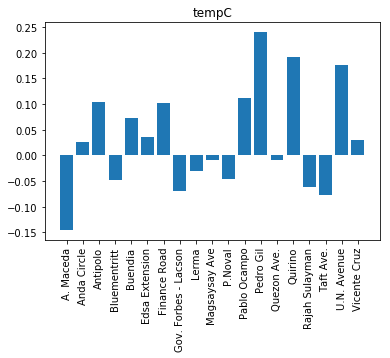

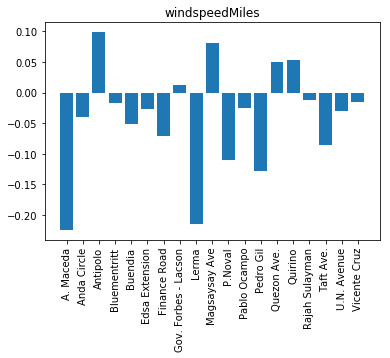

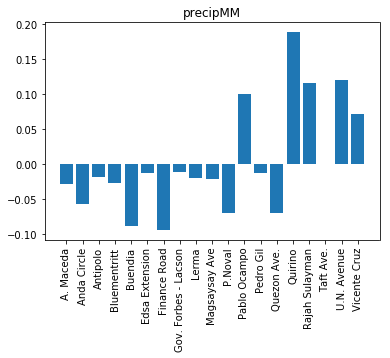

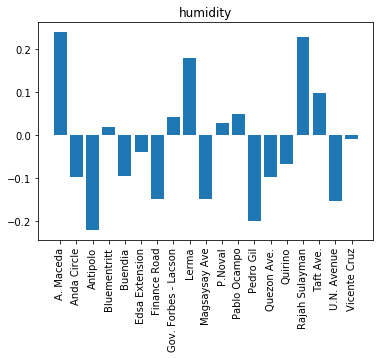

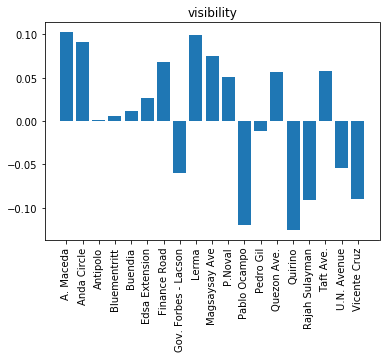

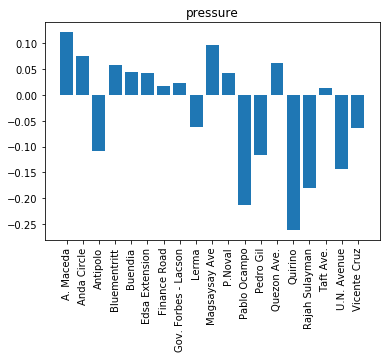

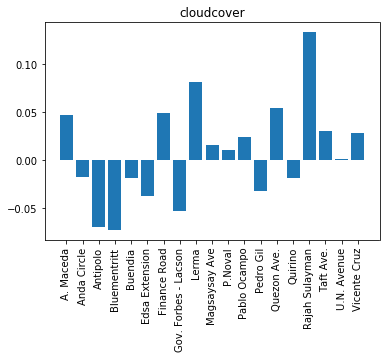

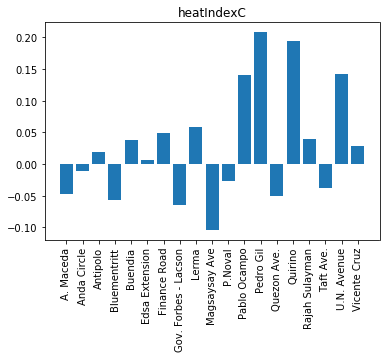

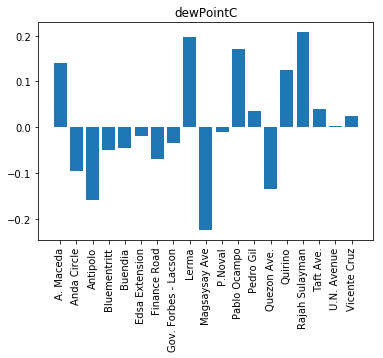

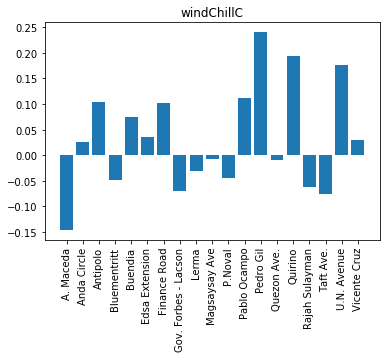

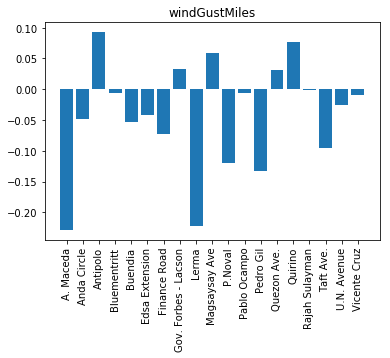

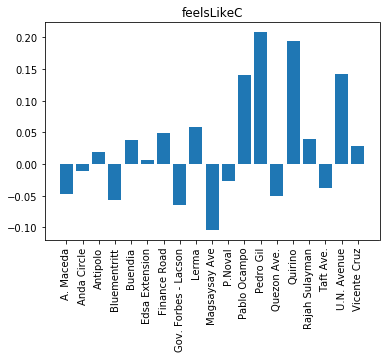

In [7]:
y = []
FEATURES = ROADS_SB_C[0].columns
for f in range(3, len(ROADS_SB_C[0].columns)): 
    y = []
    for r in ROADS_SB_C:
        y.append(r.iloc[0, f])
    plt.bar(ROADS_1, y)
    plt.title(ROADS_SB_C[0].columns[f])
    plt.xticks(rotation='vertical')
    plt.show()


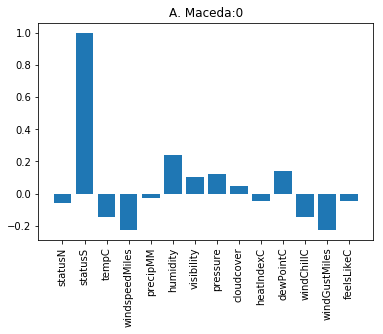

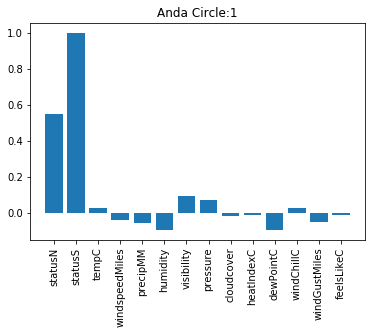

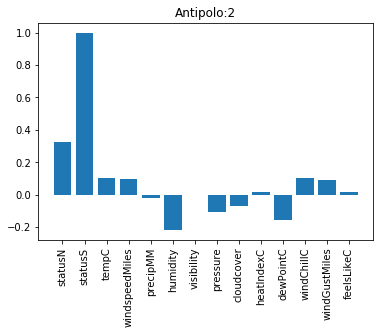

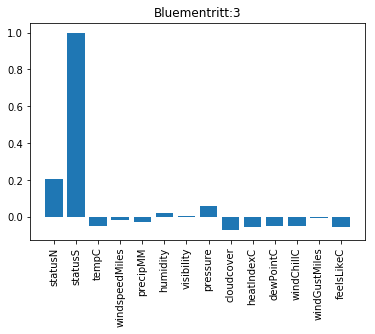

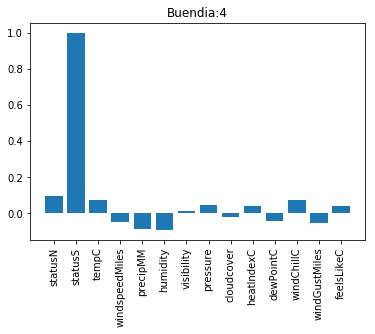

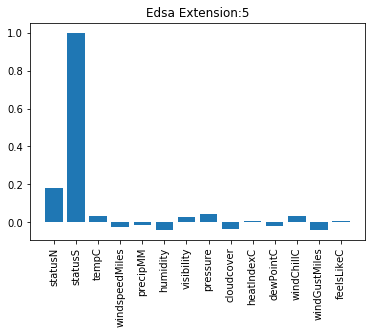

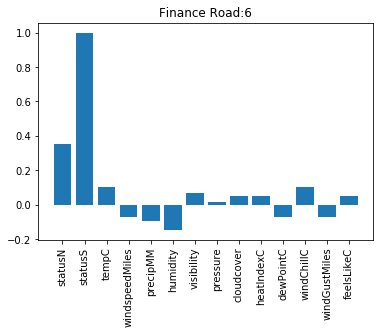

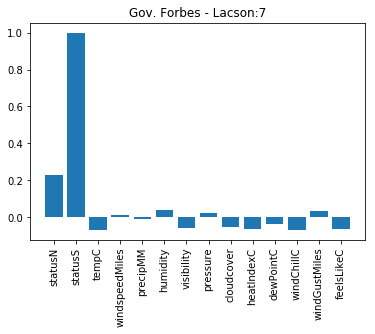

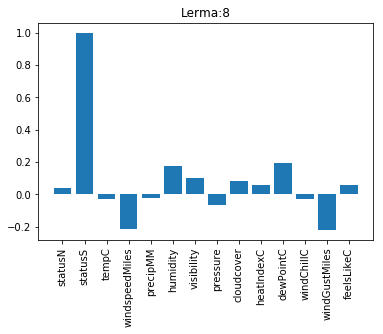

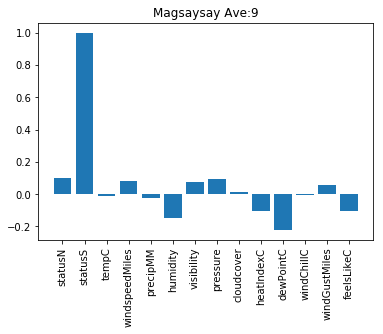

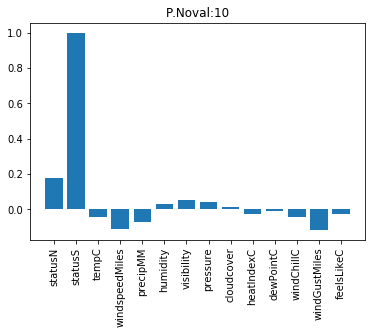

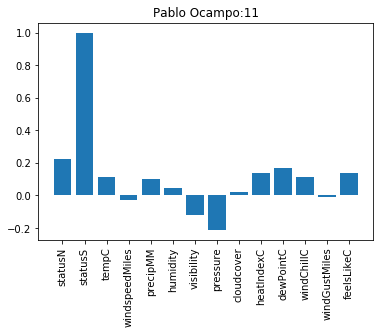

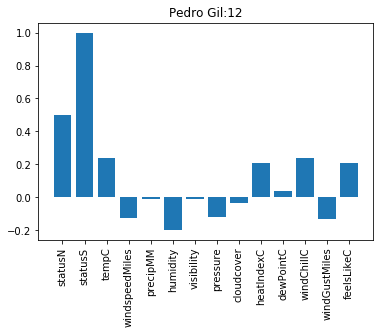

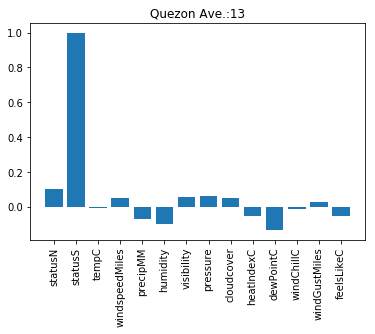

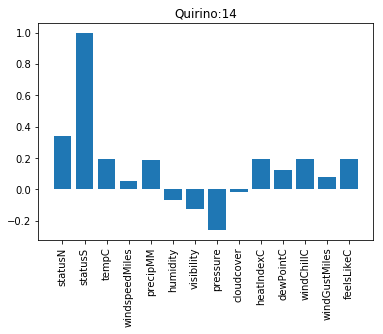

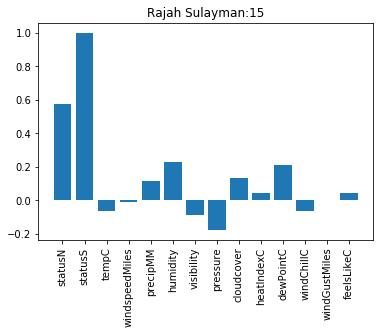

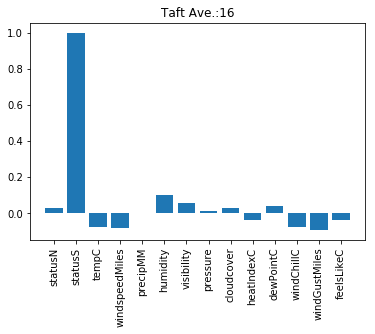

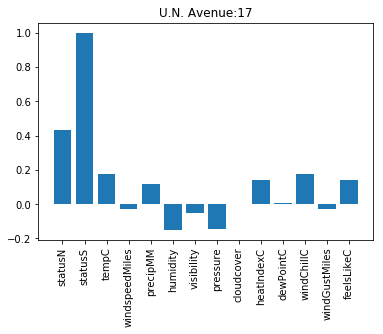

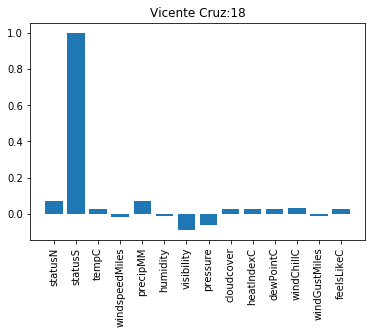

In [8]:
# for W=1
for r in range(len(ROADS_1)): 
    y = []
    for f in range(1, len(ROADS_SB_C[r].columns)):
        y.append(ROADS_SB_C[r].iloc[0, f])
    plt.bar(FEATURES[1:], y)
    plt.xticks(rotation='vertical')
    plt.title(ROADS_1[r] + ":" + str(r))

    plt.show()

<br><br><br>
## NON-ROLLING - NORTHBOUND

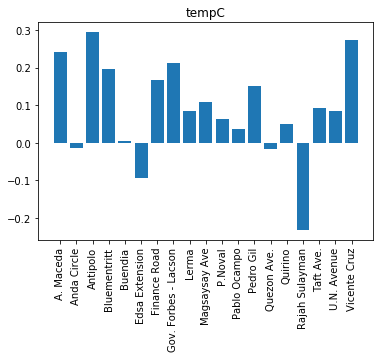

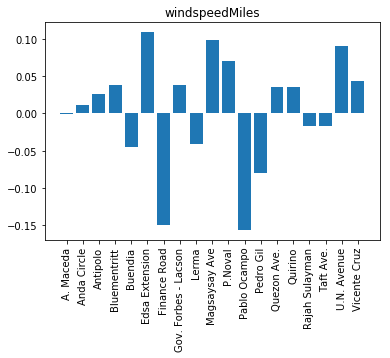

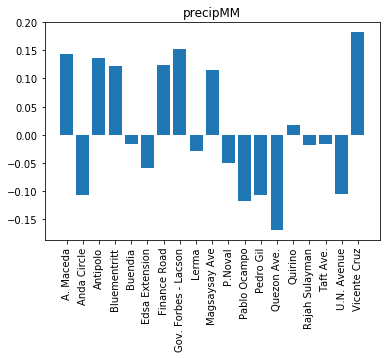

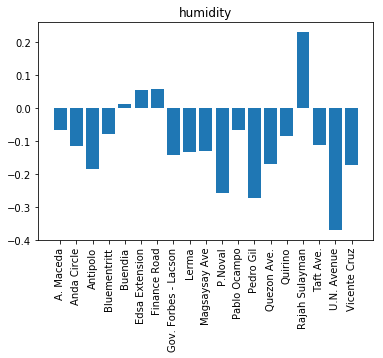

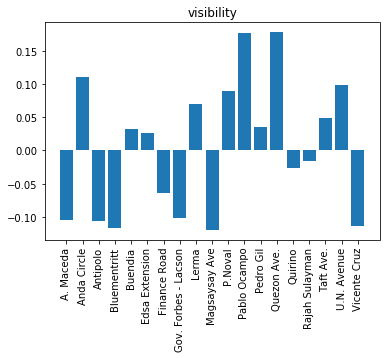

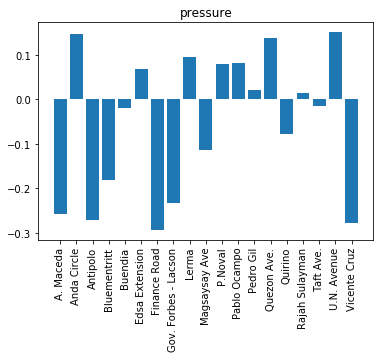

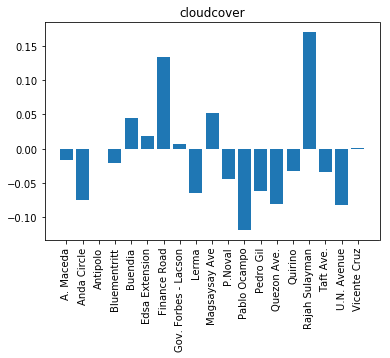

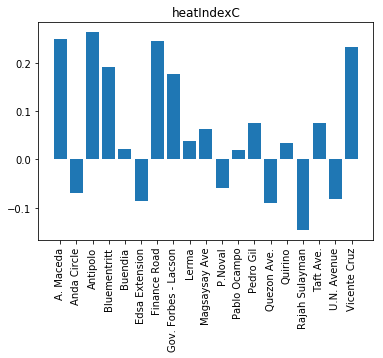

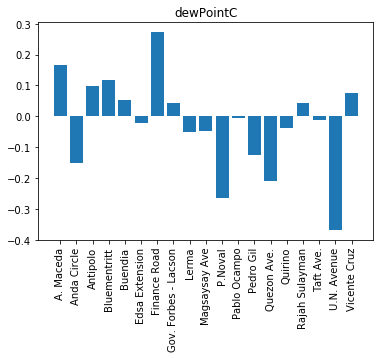

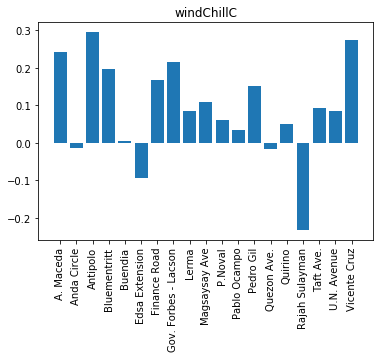

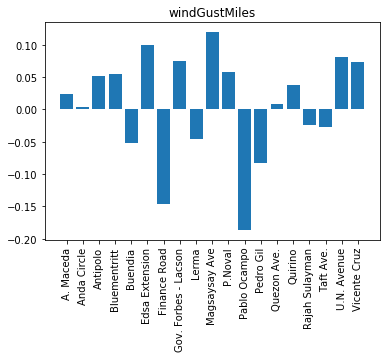

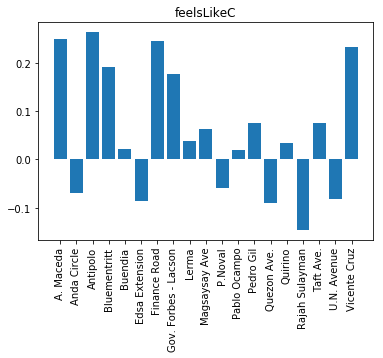

In [9]:
y = []
FEATURES = ROADS_NB_C[0].columns
for f in range(3, len(ROADS_NB_C[0].columns)): 
    y = []
    for r in ROADS_NB_C:
        y.append(r.iloc[0, f])
    plt.bar(ROADS_1, y)
    plt.title(ROADS_NB_C[0].columns[f])
    plt.xticks(rotation='vertical')
    plt.show()


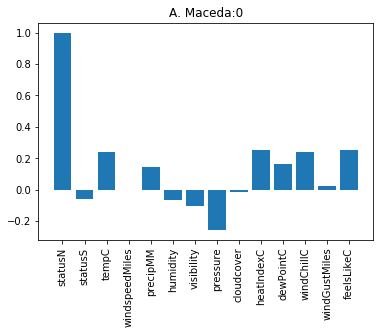

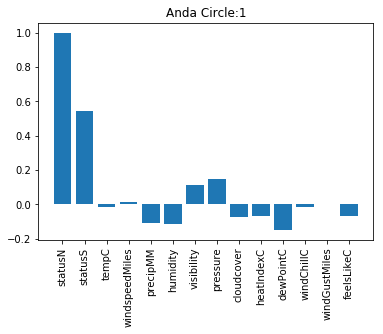

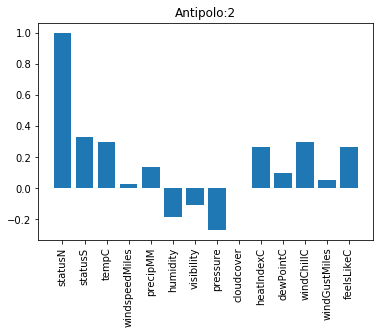

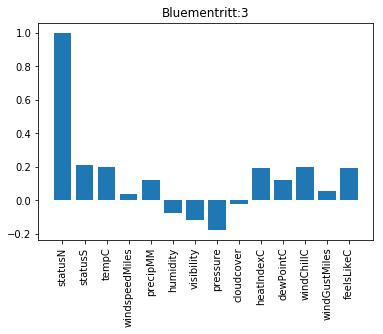

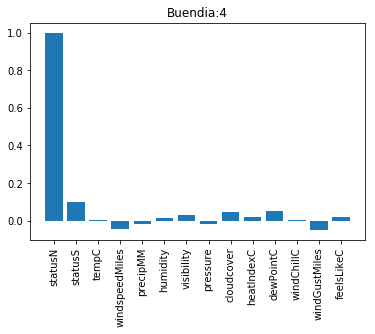

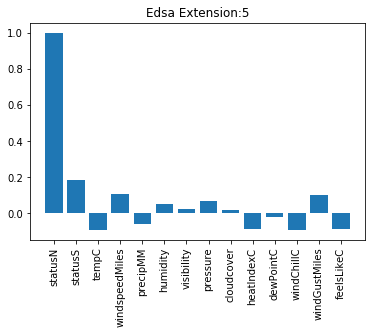

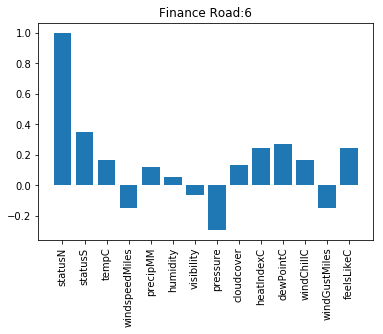

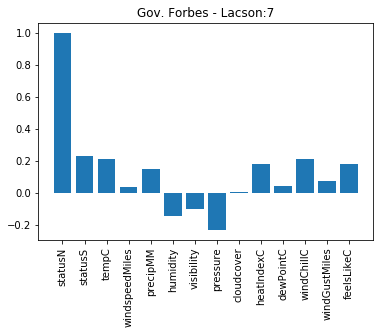

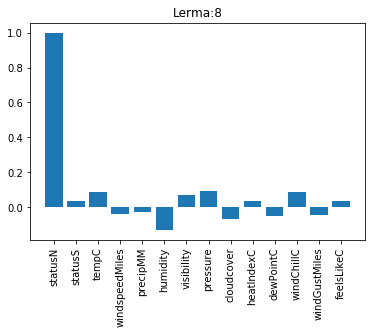

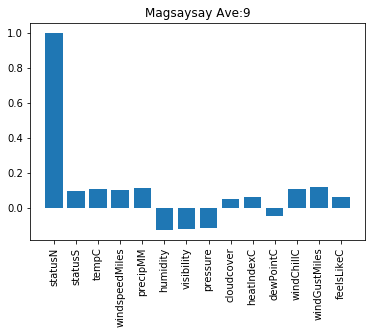

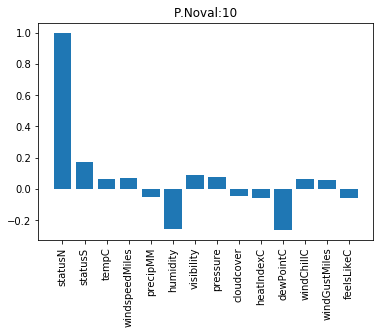

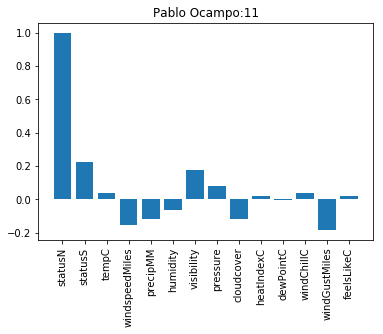

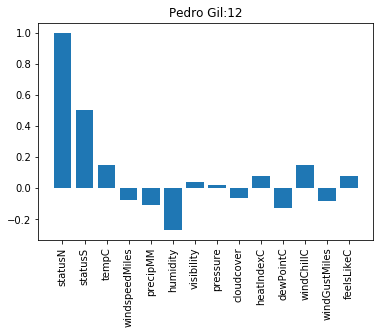

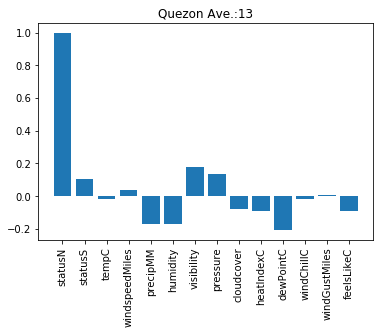

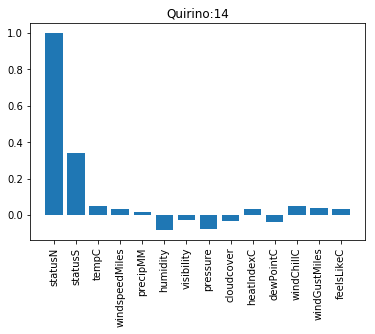

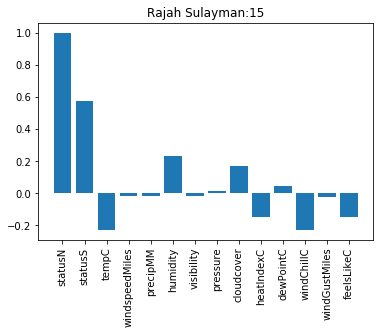

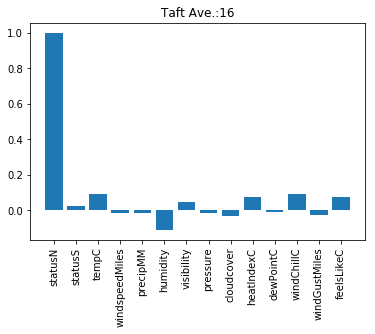

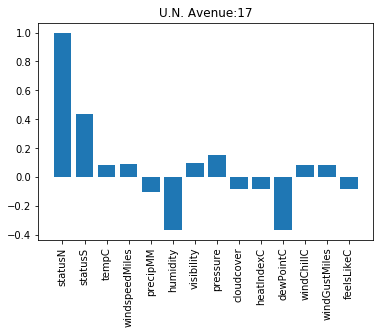

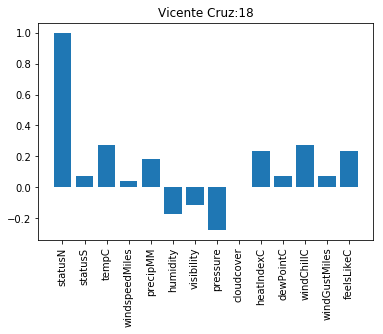

In [10]:
# for W=1
for r in range(len(ROADS_1)): 
    y = []
    for f in range(1, len(ROADS_NB_C[r].columns)):
        y.append(ROADS_NB_C[r].iloc[0, f])
    plt.bar(FEATURES[1:], y)
    plt.xticks(rotation='vertical')
    plt.title(ROADS_1[r] + ":" + str(r))

    plt.show()

<br><br><br>
# Rolling

In [11]:
CORR_R = []
for r in range(len(ROADS_1)):
    df = pd.read_csv(DATASET_DIR + "rolling_" + DATASET_DIVISION + "/" 
                     "rolling-" + DATASET_DIVISION + "_" + ROADS_1[r] + "_" + YEAR + "_" + DATASET_DIVISION + EXT,
                     skipinitialspace=True)

    df = df.rename(columns={df.columns[0]:"Features"})
    CORR_R.append(df)

In [12]:
CORR_R[0].head()

,Features,statusN,statusS,statusN_Rmean=2,statusS_Rmean=2,statusN_Rmin=2,statusS_Rmin=2,statusN_Rmax=2,statusS_Rmax=2,statusN_Rmean=3,...,precipMM_Rmax=96,humidity_Rmax=96,visibility_Rmax=96,pressure_Rmax=96,cloudcover_Rmax=96,heatIndexC_Rmax=96,dewPointC_Rmax=96,windChillC_Rmax=96,windGustMiles_Rmax=96,feelsLikeC_Rmax=96
0,statusN,1.000000,-0.057744,0.968031,-0.067747,0.958225,-0.069922,0.956306,-0.055245,0.929729,...,0.243903,-0.116969,0.090389,-0.177411,-0.006922,0.257237,0.201603,0.255508,-0.047935,0.257237
1,statusS,-0.057744,1.000000,-0.058677,0.974833,-0.074016,0.961398,-0.044317,0.948308,-0.057657,...,0.017913,0.158978,-0.040677,0.052941,0.090146,-0.029482,0.106428,-0.156723,-0.064286,-0.029482
2,statusN_Rmean=2,0.968031,-0.058677,1.000000,-0.064662,0.969583,-0.066021,0.977261,-0.053966,0.973833,...,0.250897,-0.122731,0.095753,-0.182854,-0.008496,0.266106,0.207322,0.265352,-0.051888,0.266106
3,statusS_Rmean=2,-0.067747,0.974833,-0.064662,1.000000,-0.076889,0.985584,-0.053405,0.961305,-0.063012,...,0.023283,0.166612,-0.038727,0.052343,0.095302,-0.028146,0.112632,-0.160740,-0.066825,-0.028146
4,statusN_Rmin=2,0.958225,-0.074016,0.969583,-0.076889,1.000000,-0.065452,0.923470,-0.085266,0.945343,...,0.245062,-0.119014,0.098010,-0.176580,-0.001359,0.261232,0.202359,0.261594,-0.041625,0.261232


In [13]:
WINDOWS = [2,3,4,8,12,24,32,48,96]
FEATURES = CORR_NR[0].columns

In [14]:
ROADS_SB_CR = []
ROADS_NB_CR = []

for r in range(len(ROADS_1)):
    #Analyzing Weather to Traffic 
    feature = 0 #NorthBound
    df = CORR_R[r].loc[[feature]]  
    ROADS_NB_CR.append(df)    
    
    feature = 1 #SouthBound
    df = CORR_R[r].loc[[feature]]  
    ROADS_SB_CR.append(df)    

<br>
## ROLLING - SOUTHBOUND

In [15]:
rMean = []
for w in WINDOWS:
    rMeanColumns = []
    window = w
    #Figuring out what columns are rolling mean
    for c in range(len(CORR_R[0].columns)):
        col = ROADS_SB_CR[0].columns[c]
        for f in FEATURES:
            if((f+"_Rmean=" + str(window)) == col):
                rMeanColumns.append(c)
    rMean.append(rMeanColumns)

In [16]:
ROADS_SB_CR[0]

,Features,statusN,statusS,statusN_Rmean=2,statusS_Rmean=2,statusN_Rmin=2,statusS_Rmin=2,statusN_Rmax=2,statusS_Rmax=2,statusN_Rmean=3,...,precipMM_Rmax=96,humidity_Rmax=96,visibility_Rmax=96,pressure_Rmax=96,cloudcover_Rmax=96,heatIndexC_Rmax=96,dewPointC_Rmax=96,windChillC_Rmax=96,windGustMiles_Rmax=96,feelsLikeC_Rmax=96
1,statusS,-0.057744,1.0,-0.058677,0.974833,-0.074016,0.961398,-0.044317,0.948308,-0.057657,...,0.017913,0.158978,-0.040677,0.052941,0.090146,-0.029482,0.106428,-0.156723,-0.064286,-0.029482


#### One Graph = All Features of Window w of Road r

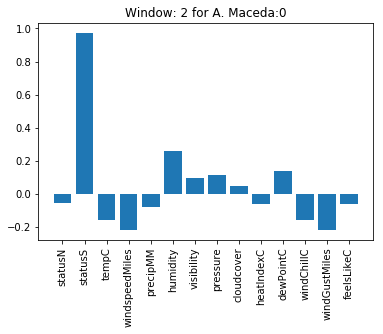

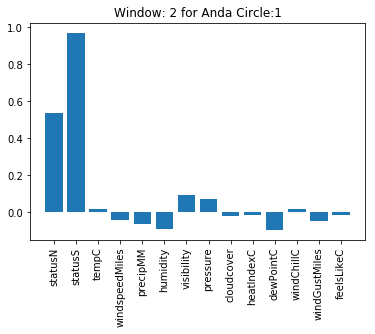

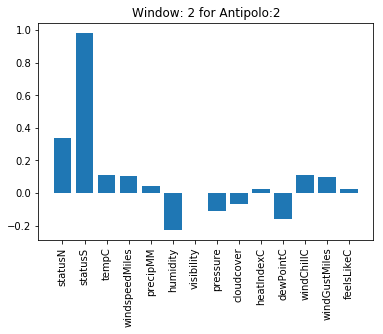

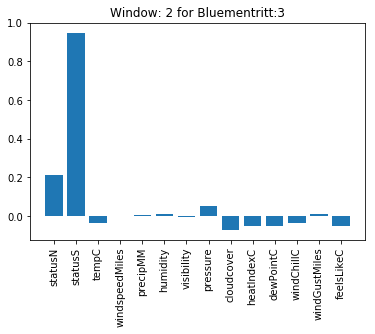

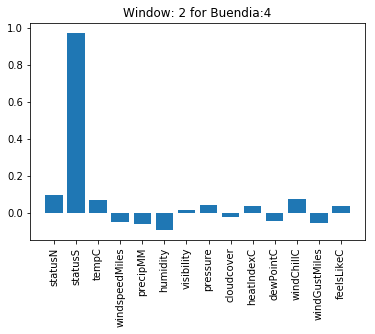

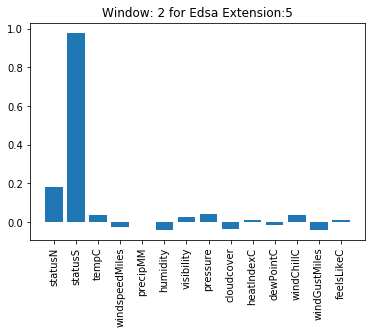

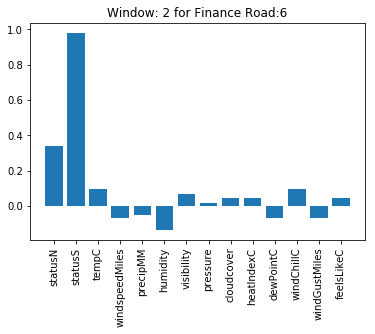

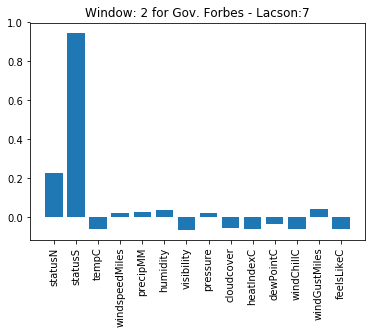

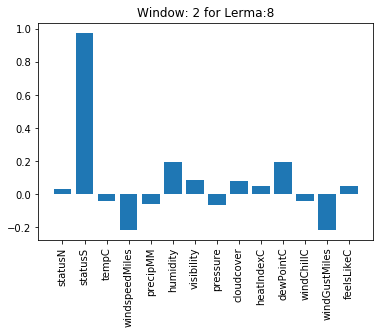

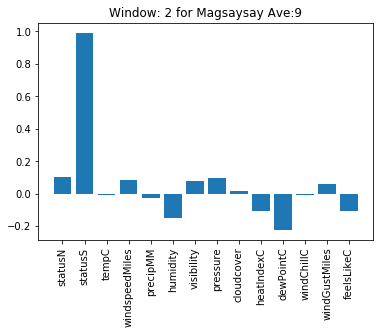

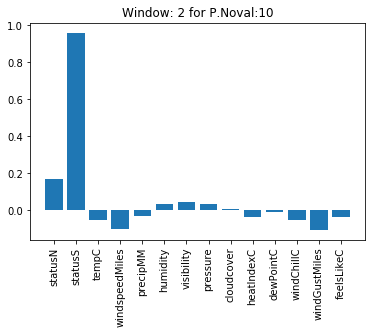

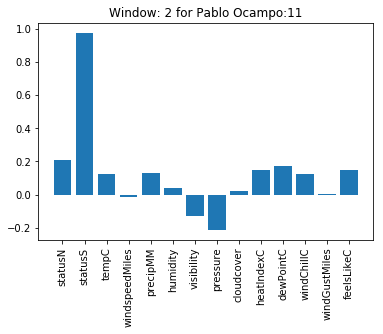

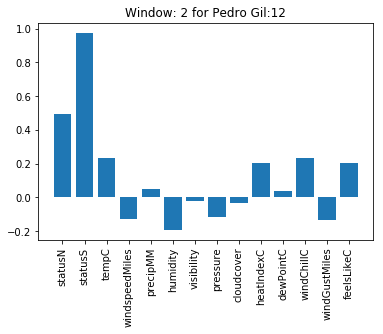

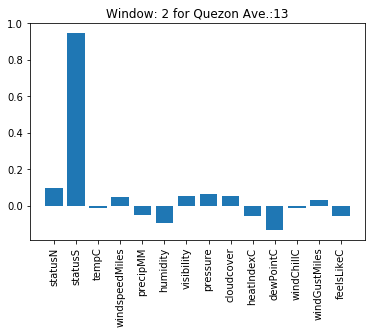

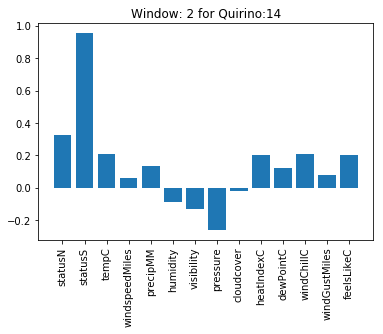

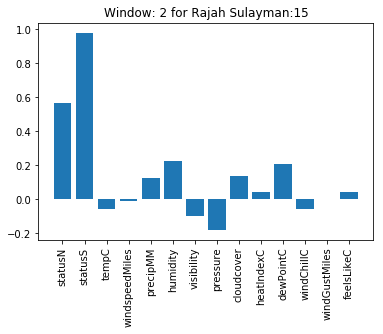

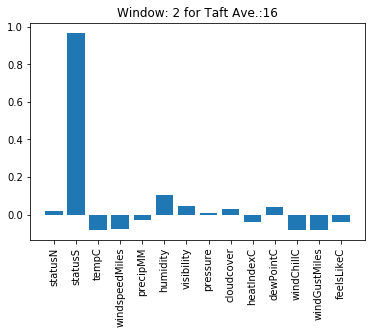

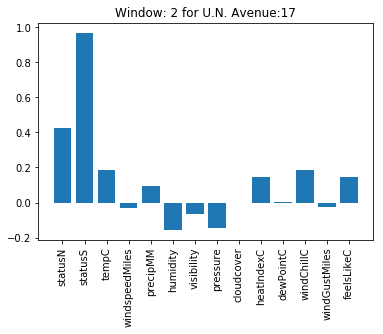

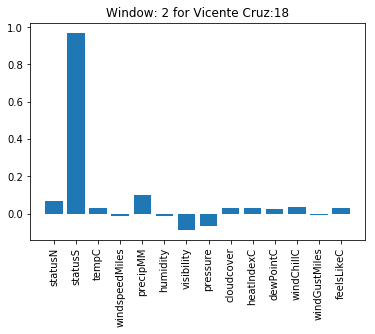

In [17]:
# for W=1
w = 0

for r in range(len(ROADS_1)): 
    y = []
    for f in range(3, len(ROADS_SB_CR[r].columns)):
        if f not in rMean[w]:
            continue
        y.append(ROADS_SB_CR[r].iloc[0, f])
    plt.bar(FEATURES[1:], y)
    plt.xticks(rotation='vertical')
    plt.title("Window: " + str(WINDOWS[w]) + " for " + ROADS_1[r] + ":" + str(r))

    plt.show()

#### All Graph = Road r.  One Graph = Window of All Features

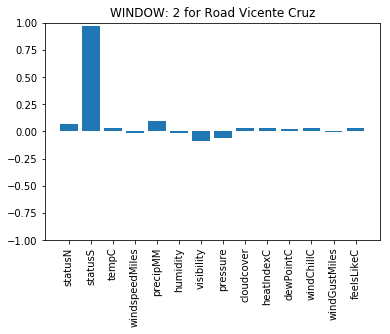

Max for WINDOW 2:0.09827936698362703



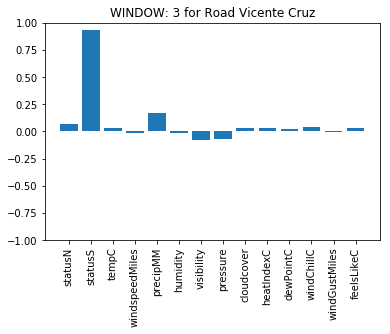

Max for WINDOW 3:0.17405535633699895



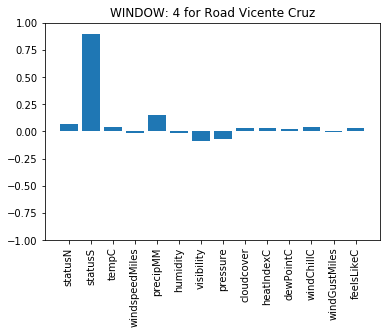

Max for WINDOW 4:0.1524821407451764



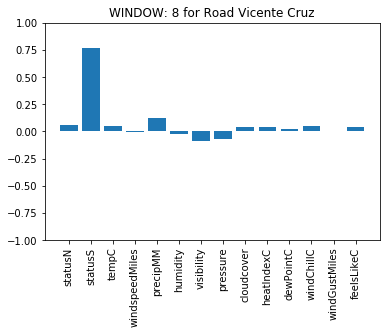

Max for WINDOW 8:0.12374813280828212



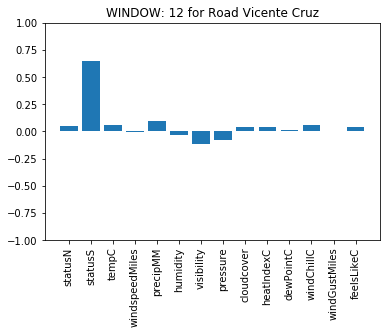

Max for WINDOW 12:0.11691299215708735



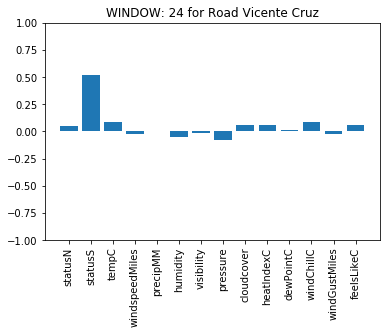

Max for WINDOW 24:0.08850806545635499



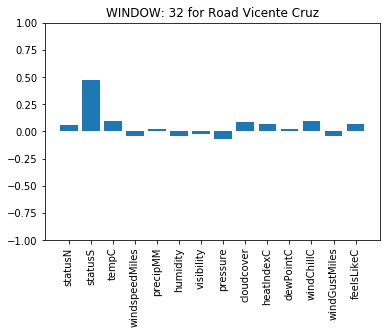

Max for WINDOW 32:0.09433558130272716



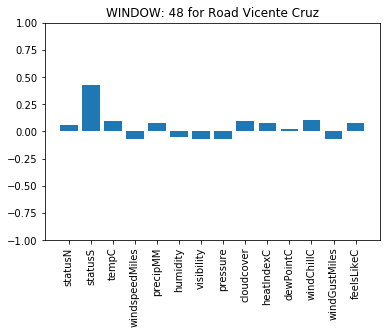

Max for WINDOW 48:0.10086586615938932



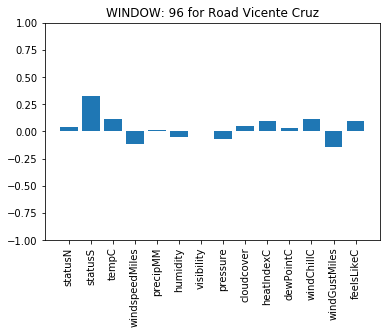

Max for WINDOW 96:0.14072769124445655
Max: 0.17405535633699895
Found in Window: 3


In [18]:
r = 18

maxes = []

fig, ax = plt.subplots()
yGroup = []
fin = False
for w in range(len(WINDOWS)): 
    y = []
    for f in range(3, len(ROADS_SB_CR[r].columns)):
        if f not in rMean[w]:
            continue
        y.append(ROADS_SB_CR[r].iloc[0, f])
    print()
    plt.bar(FEATURES[1:], y)
    plt.xticks(rotation='vertical')
    plt.ylim(ymin=-1, ymax=1)
    plt.title("WINDOW: " + str(WINDOWS[w]) + " for Road " + ROADS_1[r])    
    plt.show()
        
    print("Max for WINDOW " + str(WINDOWS[w]) + ":" + str(np.absolute(y[2:]).max()))
    maxes.append(np.absolute(y[2:]).max())
    
print("===============")
print("Max: " + str(np.amax(maxes)))
print("Found in Window: " + str(WINDOWS[np.argmax(maxes)]))

#### One Graph = One Feature of All Roads for Window w

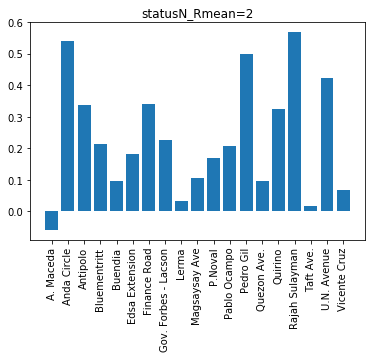

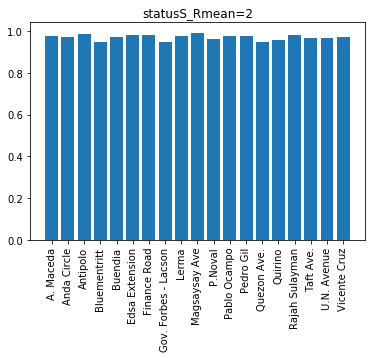

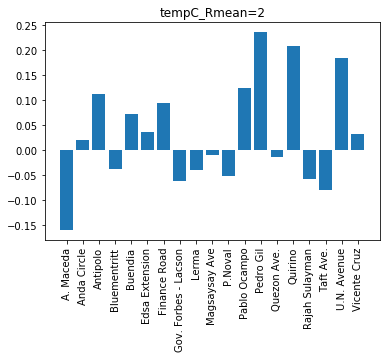

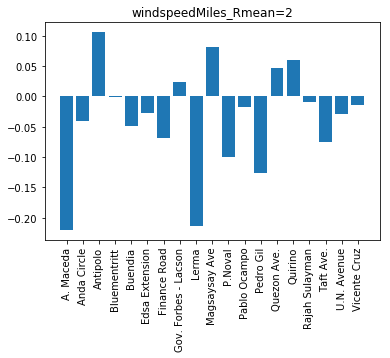

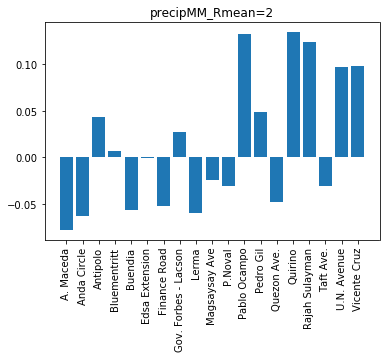

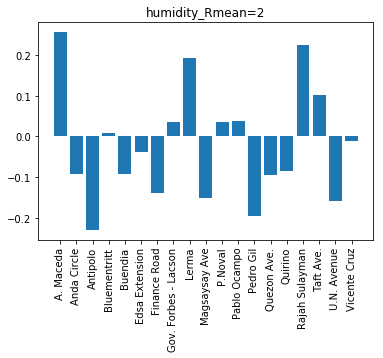

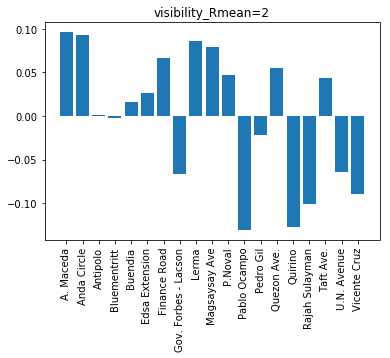

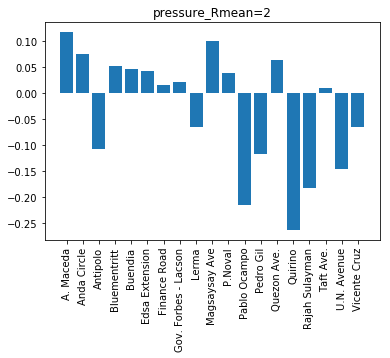

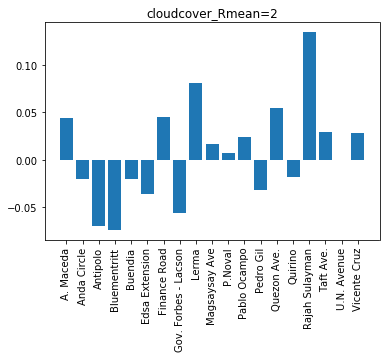

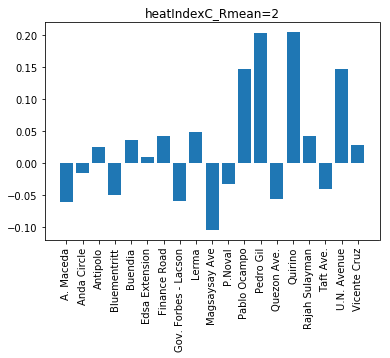

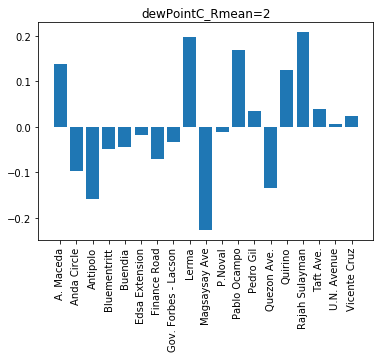

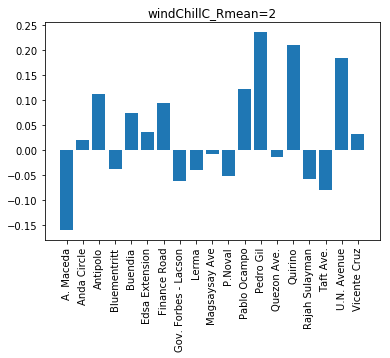

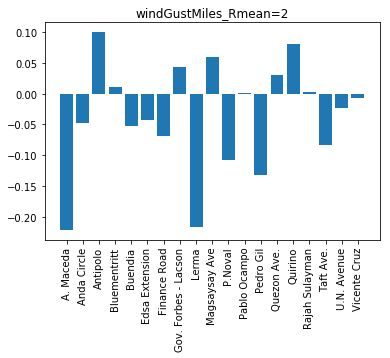

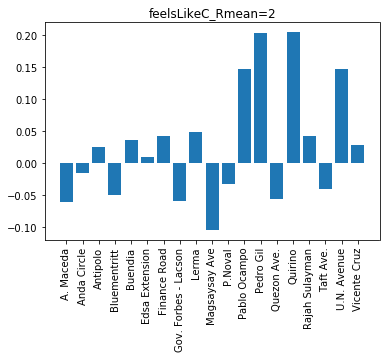

In [19]:
# for W=1
w = 0
r = 0
    
for f in range(3, len(ROADS_SB_CR[0].columns)): 
    y = []
    if f not in rMean[w]:
        continue
    for r in ROADS_SB_CR:
        y.append(r.iloc[0, f])
    plt.bar(ROADS_1, y)
    plt.xticks(rotation='vertical')
    plt.title(ROADS_SB_CR[0].columns[f])
    plt.show()

#### One Graph = One Feature for all Windows of all Roads

precipMM for Road: A. Maceda
precipMM_Rmean=2 : -0.07815151461701869 : 71
precipMM_Rmean=3 : -0.14981887400541136 : 107
precipMM_Rmean=4 : -0.11440549367941913 : 143
precipMM_Rmean=8 : -0.07834826296244313 : 179
precipMM_Rmean=12 : -0.036936605722637725 : 215
precipMM_Rmean=24 : 0.035847215549063026 : 251
precipMM_Rmean=32 : 0.006040307672207936 : 287
precipMM_Rmean=48 : -0.04621594083109566 : 323
precipMM_Rmean=96 : 0.004722874004311451 : 359
Max for Road A. Maceda:0.14981887400541136


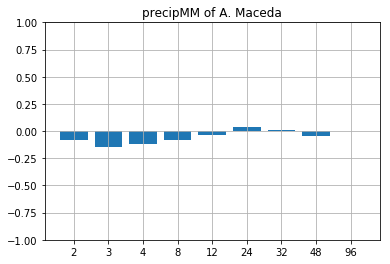

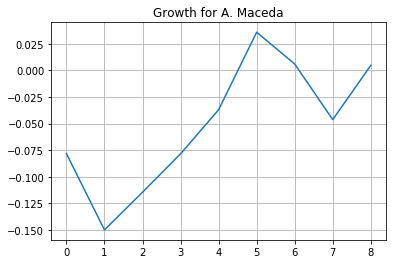

precipMM for Road: Anda Circle
precipMM_Rmean=2 : -0.0636802814516171 : 71
precipMM_Rmean=3 : 0.029629791774685083 : 107
precipMM_Rmean=4 : 0.0005205074257366455 : 143
precipMM_Rmean=8 : -8.097386586552553e-05 : 179
precipMM_Rmean=12 : -0.05976242451688313 : 215
precipMM_Rmean=24 : -0.12813167223981686 : 251
precipMM_Rmean=32 : -0.1415557353421443 : 287
precipMM_Rmean=48 : -0.09650306458701036 : 323
precipMM_Rmean=96 : -0.13089752982330366 : 359
Max for Road Anda Circle:0.1415557353421443


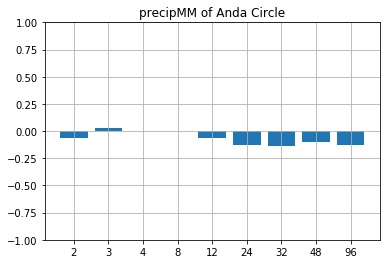

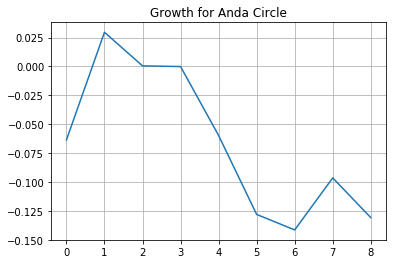

precipMM for Road: Antipolo
precipMM_Rmean=2 : 0.0429866991748165 : 71
precipMM_Rmean=3 : 0.1884814258018634 : 107
precipMM_Rmean=4 : 0.1143466946765766 : 143
precipMM_Rmean=8 : 0.05742380976127132 : 179
precipMM_Rmean=12 : 0.01756415768026011 : 215
precipMM_Rmean=24 : -0.10359102327514684 : 251
precipMM_Rmean=32 : -0.08270046067685237 : 287
precipMM_Rmean=48 : -0.010971557442525315 : 323
precipMM_Rmean=96 : -0.054624735429498174 : 359
Max for Road Antipolo:0.1884814258018634


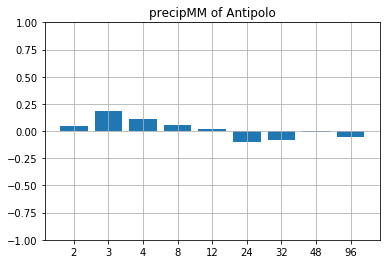

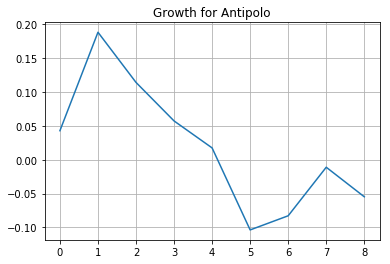

precipMM for Road: Bluementritt
precipMM_Rmean=2 : 0.006513203715750792 : 71
precipMM_Rmean=3 : 0.055865416079322584 : 107
precipMM_Rmean=4 : 0.036249627383271525 : 143
precipMM_Rmean=8 : -0.012581031521748456 : 179
precipMM_Rmean=12 : -0.044462442274171836 : 215
precipMM_Rmean=24 : -0.07370786472298818 : 251
precipMM_Rmean=32 : -0.06225092359922205 : 287
precipMM_Rmean=48 : -0.040149298126706943 : 323
precipMM_Rmean=96 : -0.049336598913887864 : 359
Max for Road Bluementritt:0.07370786472298818


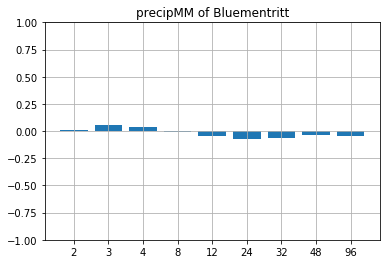

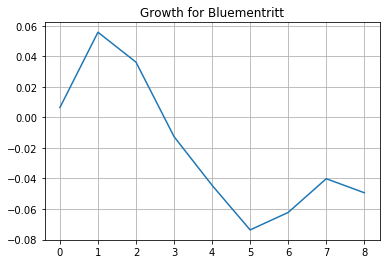

precipMM for Road: Buendia
precipMM_Rmean=2 : -0.0568297894422436 : 71
precipMM_Rmean=3 : 0.07735782968792862 : 107
precipMM_Rmean=4 : 0.019519587864185745 : 143
precipMM_Rmean=8 : 0.01758090432943124 : 179
precipMM_Rmean=12 : 0.008579908058475397 : 215
precipMM_Rmean=24 : -0.0679027164536484 : 251
precipMM_Rmean=32 : -0.06211701215355106 : 287
precipMM_Rmean=48 : 0.031417803569052015 : 323
precipMM_Rmean=96 : -0.02438446428689843 : 359
Max for Road Buendia:0.07735782968792862


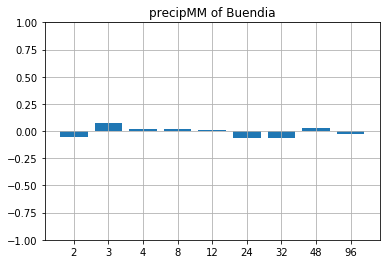

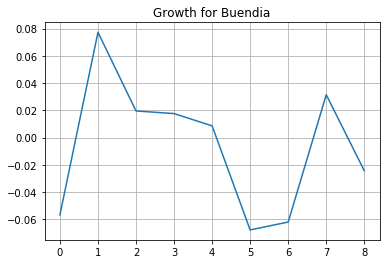

precipMM for Road: Edsa Extension
precipMM_Rmean=2 : -0.001338570571807888 : 71
precipMM_Rmean=3 : -0.015754369205128498 : 107
precipMM_Rmean=4 : 0.015728504189000868 : 143
precipMM_Rmean=8 : 0.008086998302258503 : 179
precipMM_Rmean=12 : -0.007498789224214418 : 215
precipMM_Rmean=24 : -0.006070064751174044 : 251
precipMM_Rmean=32 : -0.004120986648362727 : 287
precipMM_Rmean=48 : 0.012728381784530035 : 323
precipMM_Rmean=96 : 0.019760260894641786 : 359
Max for Road Edsa Extension:0.019760260894641786


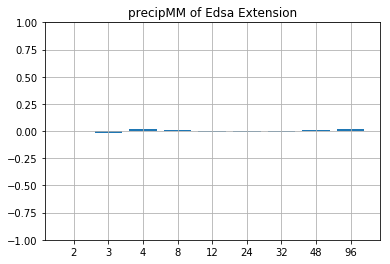

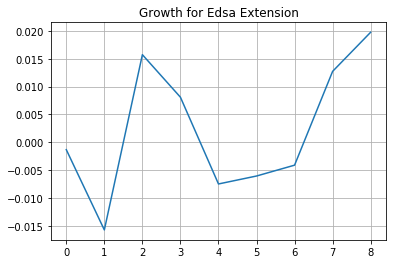

precipMM for Road: Finance Road
precipMM_Rmean=2 : -0.05254315498261128 : 71
precipMM_Rmean=3 : 0.0559599321583497 : 107
precipMM_Rmean=4 : 0.01659163201055715 : 143
precipMM_Rmean=8 : 0.0759194360209292 : 179
precipMM_Rmean=12 : -0.012646791575859384 : 215
precipMM_Rmean=24 : -0.08219372789691698 : 251
precipMM_Rmean=32 : -0.07821790565857323 : 287
precipMM_Rmean=48 : 0.006024330109784387 : 323
precipMM_Rmean=96 : -0.04940026281778365 : 359
Max for Road Finance Road:0.08219372789691698


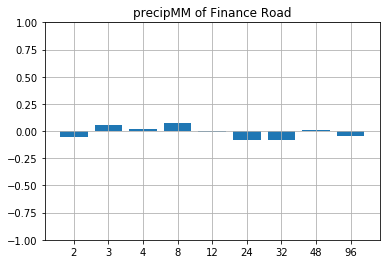

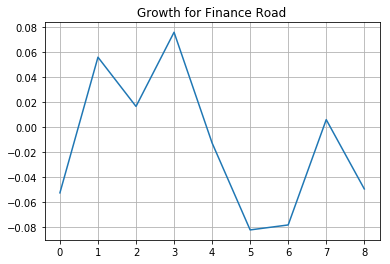

precipMM for Road: Gov. Forbes - Lacson
precipMM_Rmean=2 : 0.02667754589088382 : 71
precipMM_Rmean=3 : 0.11125986965741502 : 107
precipMM_Rmean=4 : 0.09741355796138217 : 143
precipMM_Rmean=8 : 0.07950824649960025 : 179
precipMM_Rmean=12 : 0.045844590990828535 : 215
precipMM_Rmean=24 : -0.03582809054671485 : 251
precipMM_Rmean=32 : -0.029153726320253093 : 287
precipMM_Rmean=48 : 0.0190545831114797 : 323
precipMM_Rmean=96 : -0.0032346113167186718 : 359
Max for Road Gov. Forbes - Lacson:0.11125986965741502


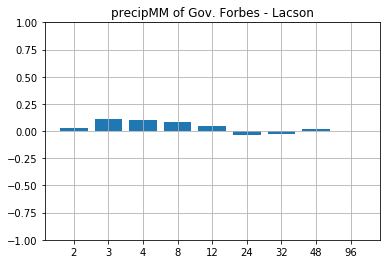

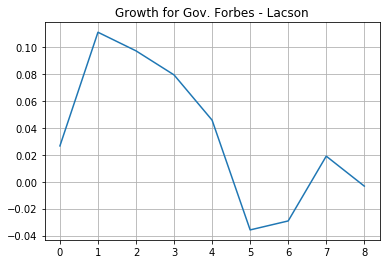

precipMM for Road: Lerma
precipMM_Rmean=2 : -0.060162478412106014 : 71
precipMM_Rmean=3 : -0.15319863444729304 : 107
precipMM_Rmean=4 : -0.14203813264075382 : 143
precipMM_Rmean=8 : -0.050447308121157504 : 179
precipMM_Rmean=12 : 0.004056919261310964 : 215
precipMM_Rmean=24 : 0.14546350227685334 : 251
precipMM_Rmean=32 : 0.13526212401361126 : 287
precipMM_Rmean=48 : 0.05075693814078608 : 323
precipMM_Rmean=96 : 0.16309417035122198 : 359
Max for Road Lerma:0.16309417035122198


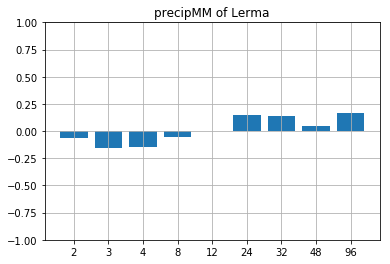

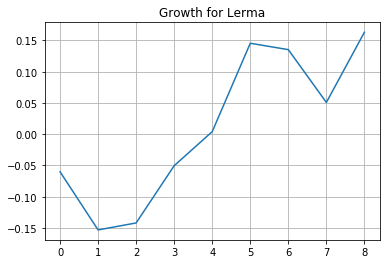

precipMM for Road: Magsaysay Ave
precipMM_Rmean=2 : -0.025040375411497416 : 71
precipMM_Rmean=3 : 0.04634517828997997 : 107
precipMM_Rmean=4 : 0.03519519556391616 : 143
precipMM_Rmean=8 : -0.035581270476071895 : 179
precipMM_Rmean=12 : -0.029179159201376113 : 215
precipMM_Rmean=24 : -0.09989241197565114 : 251
precipMM_Rmean=32 : -0.07729667363627833 : 287
precipMM_Rmean=48 : -0.06925500161318915 : 323
precipMM_Rmean=96 : -0.1325470149939088 : 359
Max for Road Magsaysay Ave:0.1325470149939088


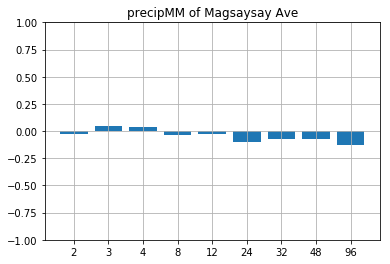

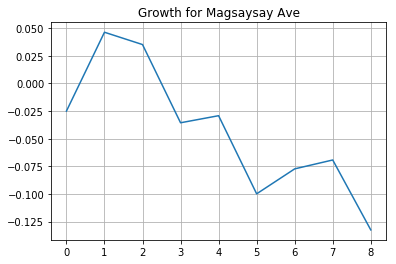

precipMM for Road: P.Noval
precipMM_Rmean=2 : -0.03095627681600628 : 71
precipMM_Rmean=3 : 0.009203141299392084 : 107
precipMM_Rmean=4 : -0.014598729656133791 : 143
precipMM_Rmean=8 : -0.011395764034607365 : 179
precipMM_Rmean=12 : 0.017773817673047504 : 215
precipMM_Rmean=24 : -0.028422732070467586 : 251
precipMM_Rmean=32 : -0.02400645212056632 : 287
precipMM_Rmean=48 : -0.012720298379353005 : 323
precipMM_Rmean=96 : -0.02329014321349437 : 359
Max for Road P.Noval:0.03095627681600628


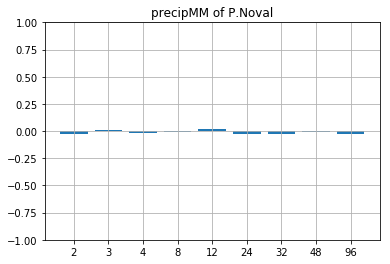

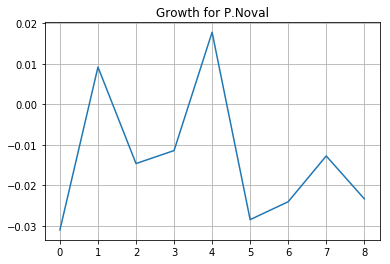

precipMM for Road: Pablo Ocampo
precipMM_Rmean=2 : 0.13260668648671473 : 71
precipMM_Rmean=3 : 0.0907024391311962 : 107
precipMM_Rmean=4 : 0.0673515675384778 : 143
precipMM_Rmean=8 : 0.11983260623701535 : 179
precipMM_Rmean=12 : 0.07245951807530596 : 215
precipMM_Rmean=24 : 0.17791454012340366 : 251
precipMM_Rmean=32 : 0.17000204198000646 : 287
precipMM_Rmean=48 : 0.1320480213291646 : 323
precipMM_Rmean=96 : 0.1705852115325027 : 359
Max for Road Pablo Ocampo:0.17791454012340366


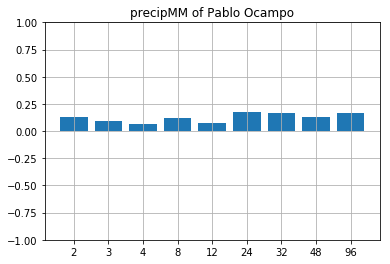

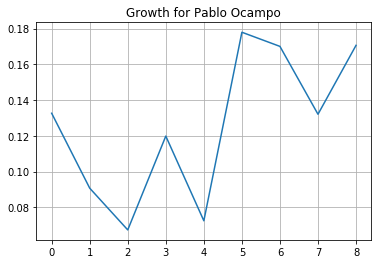

precipMM for Road: Pedro Gil
precipMM_Rmean=2 : 0.047999080501090516 : 71
precipMM_Rmean=3 : 0.18795389235290405 : 107
precipMM_Rmean=4 : 0.09602689243619647 : 143
precipMM_Rmean=8 : 0.15933825782822605 : 179
precipMM_Rmean=12 : 0.11633110458938975 : 215
precipMM_Rmean=24 : 0.04598207000830562 : 251
precipMM_Rmean=32 : 0.039099170849330435 : 287
precipMM_Rmean=48 : 0.1122656686081402 : 323
precipMM_Rmean=96 : 0.03959350708799012 : 359
Max for Road Pedro Gil:0.18795389235290405


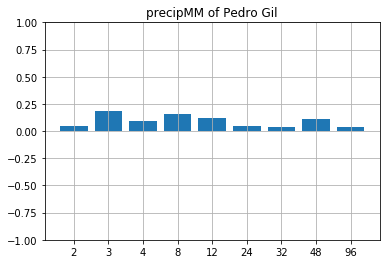

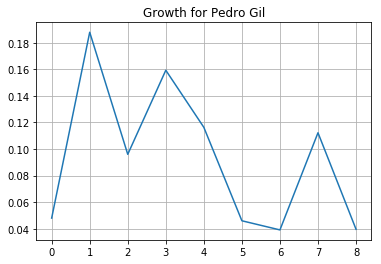

precipMM for Road: Quezon Ave.
precipMM_Rmean=2 : -0.04864670448254319 : 71
precipMM_Rmean=3 : 0.00897283860834522 : 107
precipMM_Rmean=4 : 0.009863066339467545 : 143
precipMM_Rmean=8 : 0.011083803975157494 : 179
precipMM_Rmean=12 : 0.009137758915449795 : 215
precipMM_Rmean=24 : -0.06909961106125925 : 251
precipMM_Rmean=32 : -0.08558340235131852 : 287
precipMM_Rmean=48 : -0.05599830603012956 : 323
precipMM_Rmean=96 : -0.09440642381667548 : 359
Max for Road Quezon Ave.:0.09440642381667548


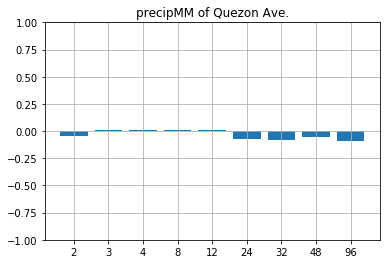

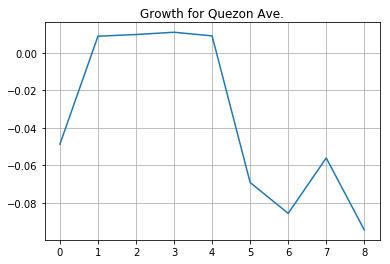

precipMM for Road: Quirino
precipMM_Rmean=2 : 0.13439537855580858 : 71
precipMM_Rmean=3 : 0.13234012050008906 : 107
precipMM_Rmean=4 : 0.03194009259047683 : 143
precipMM_Rmean=8 : 0.045021296044772605 : 179
precipMM_Rmean=12 : 0.044768650205255375 : 215
precipMM_Rmean=24 : 0.12679673346054973 : 251
precipMM_Rmean=32 : 0.13186699745091754 : 287
precipMM_Rmean=48 : 0.0582391383736483 : 323
precipMM_Rmean=96 : 0.09730887022559773 : 359
Max for Road Quirino:0.13439537855580858


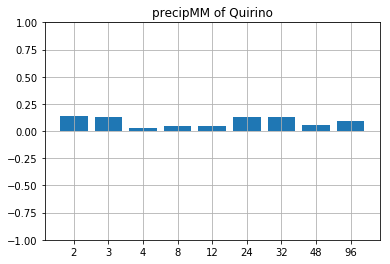

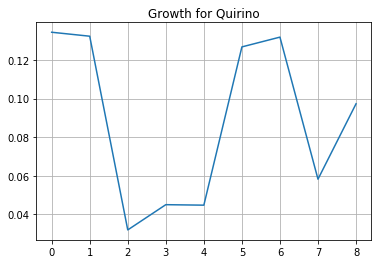

precipMM for Road: Rajah Sulayman
precipMM_Rmean=2 : 0.1233735607834658 : 71
precipMM_Rmean=3 : -0.043210673470725484 : 107
precipMM_Rmean=4 : -0.015179744527778288 : 143
precipMM_Rmean=8 : 0.020533488102119864 : 179
precipMM_Rmean=12 : 0.08111496078915555 : 215
precipMM_Rmean=24 : 0.2286441228209428 : 251
precipMM_Rmean=32 : 0.2097031244380436 : 287
precipMM_Rmean=48 : 0.10896426644253326 : 323
precipMM_Rmean=96 : 0.188654676058418 : 359
Max for Road Rajah Sulayman:0.2286441228209428


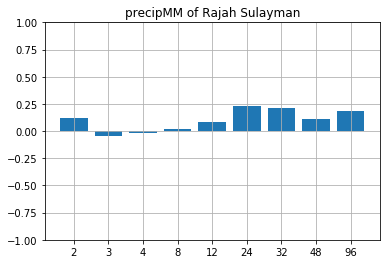

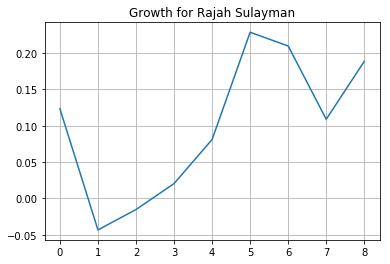

precipMM for Road: Taft Ave.
precipMM_Rmean=2 : -0.030731116190575086 : 71
precipMM_Rmean=3 : -0.14633382660756847 : 107
precipMM_Rmean=4 : -0.09370429178930173 : 143
precipMM_Rmean=8 : -0.09191204961804852 : 179
precipMM_Rmean=12 : -0.05152397092464539 : 215
precipMM_Rmean=24 : 0.050441842140337936 : 251
precipMM_Rmean=32 : 0.04522354434029576 : 287
precipMM_Rmean=48 : -0.03637009989411292 : 323
precipMM_Rmean=96 : -0.0027863416675475 : 359
Max for Road Taft Ave.:0.14633382660756847


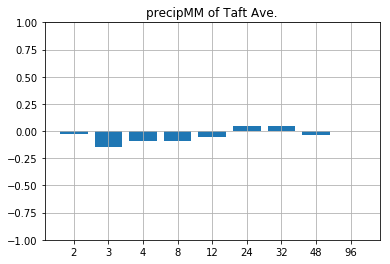

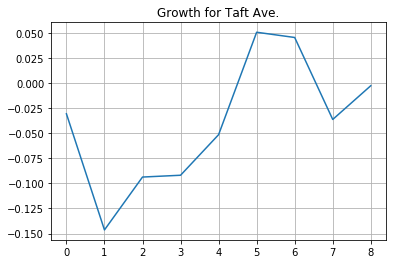

precipMM for Road: U.N. Avenue
precipMM_Rmean=2 : 0.09686258180830698 : 71
precipMM_Rmean=3 : 0.22535322346483636 : 107
precipMM_Rmean=4 : 0.09245030670764068 : 143
precipMM_Rmean=8 : 0.10656150391884404 : 179
precipMM_Rmean=12 : 0.09743273554764338 : 215
precipMM_Rmean=24 : 0.06146861287215547 : 251
precipMM_Rmean=32 : 0.05170149842596503 : 287
precipMM_Rmean=48 : 0.06903680330986918 : 323
precipMM_Rmean=96 : 0.06455807976957198 : 359
Max for Road U.N. Avenue:0.22535322346483636


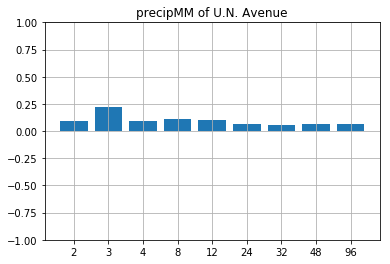

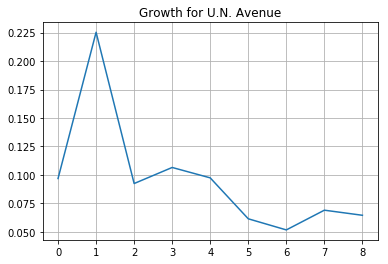

precipMM for Road: Vicente Cruz
precipMM_Rmean=2 : 0.09827936698362703 : 71
precipMM_Rmean=3 : 0.17405535633699895 : 107
precipMM_Rmean=4 : 0.1524821407451764 : 143
precipMM_Rmean=8 : 0.12374813280828212 : 179
precipMM_Rmean=12 : 0.0927061038461689 : 215
precipMM_Rmean=24 : 0.002475553074220539 : 251
precipMM_Rmean=32 : 0.018063991283433396 : 287
precipMM_Rmean=48 : 0.07469390484349052 : 323
precipMM_Rmean=96 : 0.01767931018068411 : 359
Max for Road Vicente Cruz:0.17405535633699895


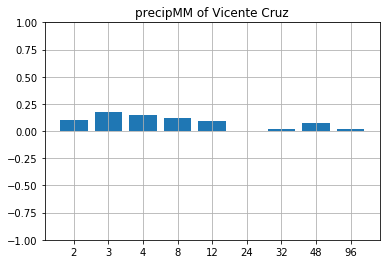

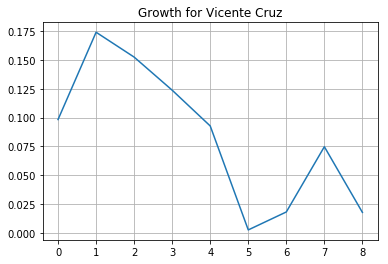

In [20]:
w = 0
r = 0
feature = 'precipMM'
y = []

for r in range(len(ROADS_1)):
    y = []
    print(feature + " for Road: " + ROADS_1[r])
    for w in range(len(WINDOWS)):
        for f in range(3, len(ROADS_SB_CR[r].columns)): 
            if f not in rMean[w]:
                continue
            elif feature not in ROADS_SB_CR[r].columns[f]:
                continue
            print(str(ROADS_SB_CR[r].columns[f]) + " : " + str(ROADS_SB_CR[r].iloc[0, f]) + " : " + str(f))
            y.append(ROADS_SB_CR[r].iloc[0, f])
            
    print("Max for Road " + ROADS_1[r] + ":" + str(np.absolute(y).max()))
    plt.bar(np.arange(len(WINDOWS)), y)
    plt.ylim(ymax=1, ymin=-1)
    plt.xticks(np.arange(len(WINDOWS)), WINDOWS)
    plt.grid()
    plt.title(feature + " of " + ROADS_1[r])
    plt.show()
    
    plt.plot(y)
    plt.grid()
    plt.title("Growth for " + ROADS_1[r])

    plt.show()

<br><br><br>
## ROLLING - NORTHBOUND

In [21]:
rMean = []
for w in WINDOWS:
    rMeanColumns = []
    window = w
    #Figuring out what columns are rolling mean
    for c in range(len(CORR_R[0].columns)):
        col = ROADS_NB_CR[0].columns[c]
        for f in FEATURES:
            if((f+"_Rmean=" + str(window)) == col):
                rMeanColumns.append(c)
    rMean.append(rMeanColumns)

In [22]:
ROADS_NB_CR[0]

,Features,statusN,statusS,statusN_Rmean=2,statusS_Rmean=2,statusN_Rmin=2,statusS_Rmin=2,statusN_Rmax=2,statusS_Rmax=2,statusN_Rmean=3,...,precipMM_Rmax=96,humidity_Rmax=96,visibility_Rmax=96,pressure_Rmax=96,cloudcover_Rmax=96,heatIndexC_Rmax=96,dewPointC_Rmax=96,windChillC_Rmax=96,windGustMiles_Rmax=96,feelsLikeC_Rmax=96
0,statusN,1.0,-0.057744,0.968031,-0.067747,0.958225,-0.069922,0.956306,-0.055245,0.929729,...,0.243903,-0.116969,0.090389,-0.177411,-0.006922,0.257237,0.201603,0.255508,-0.047935,0.257237


#### One Graph = All Features of Window w of Road r

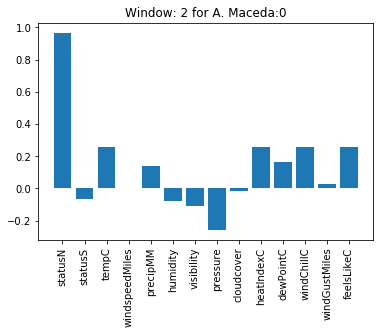

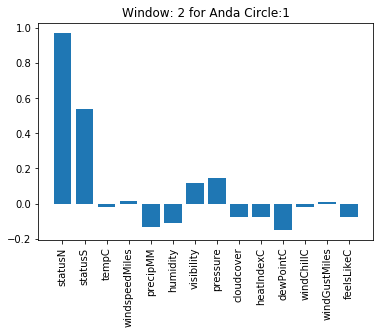

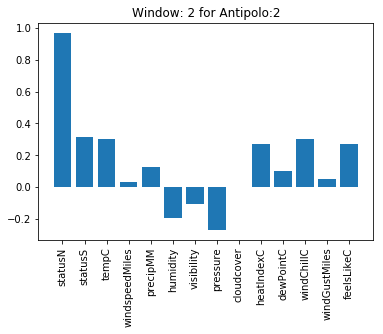

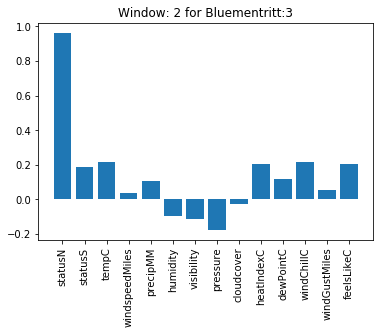

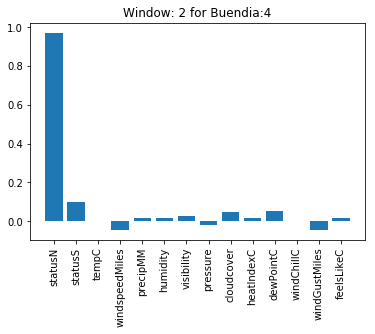

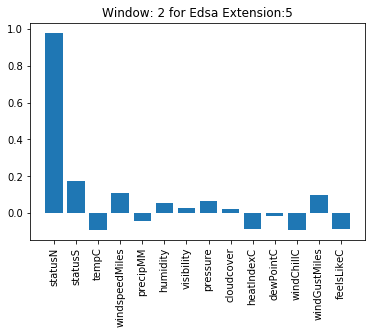

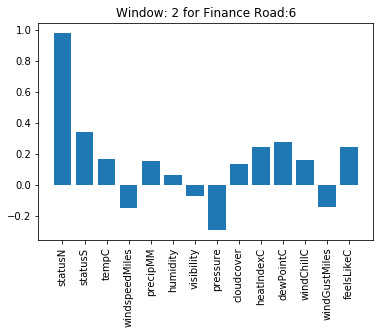

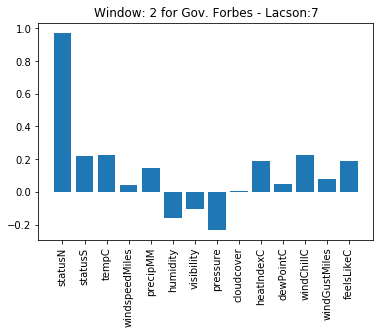

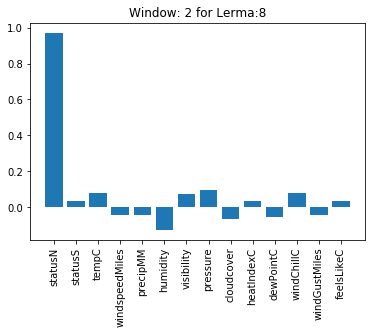

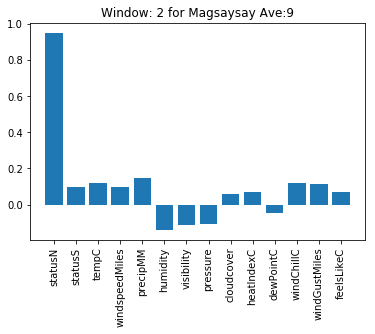

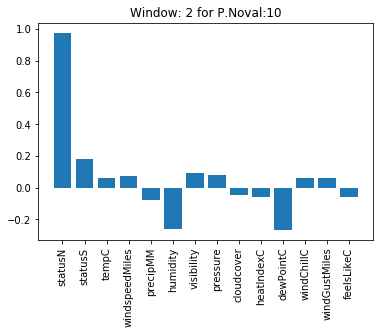

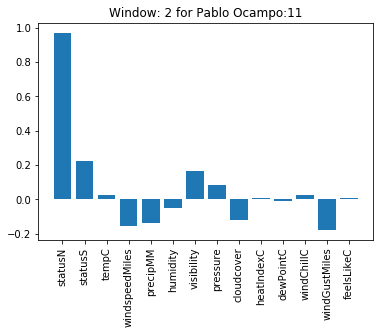

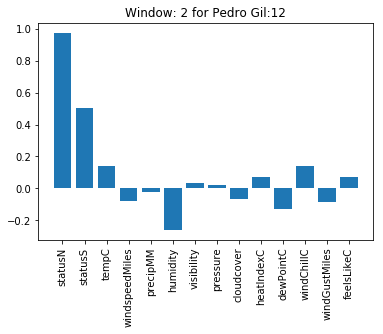

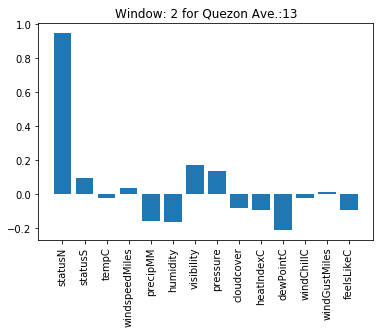

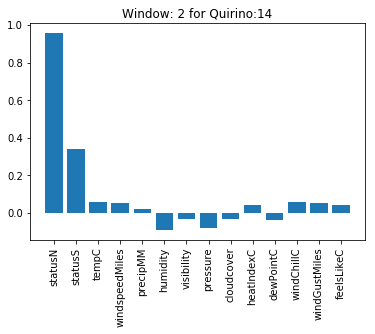

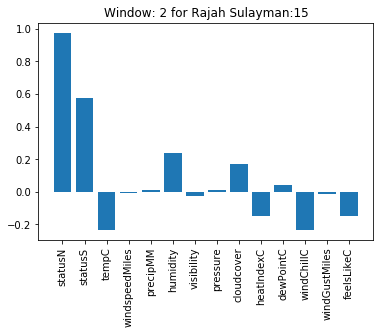

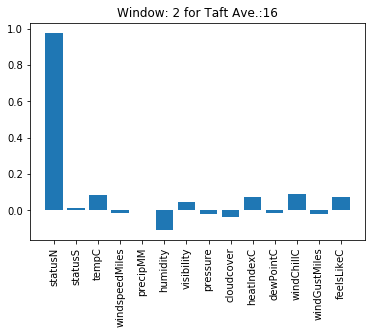

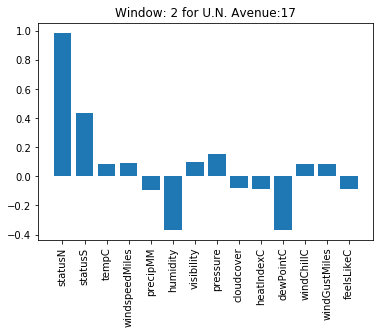

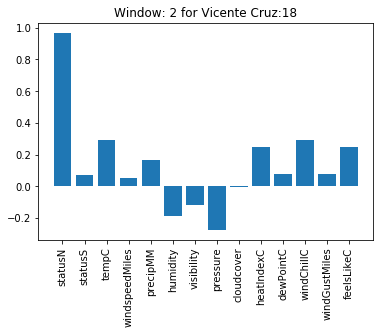

In [23]:
# for W=1
w = 0

for r in range(len(ROADS_1)): 
    y = []
    for f in range(3, len(ROADS_NB_CR[r].columns)):
        if f not in rMean[w]:
            continue
        y.append(ROADS_NB_CR[r].iloc[0, f])
    plt.bar(FEATURES[1:], y)
    plt.xticks(rotation='vertical')
    plt.title("Window: " + str(WINDOWS[w]) + " for " + ROADS_1[r] + ":" + str(r))

    plt.show()

#### All Graph = Road r.  One Graph = Window of All Features

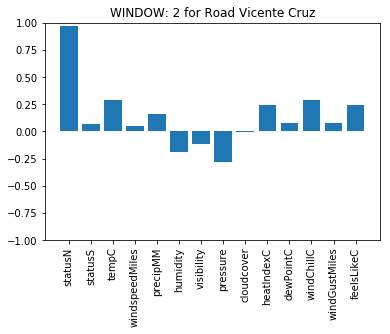

Max for WINDOW 2:0.289054826504606



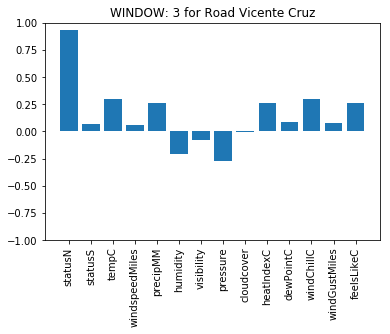

Max for WINDOW 3:0.3007978266189714



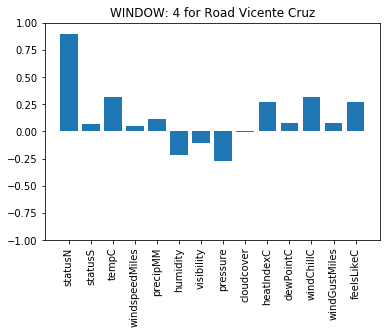

Max for WINDOW 4:0.3147518158495251



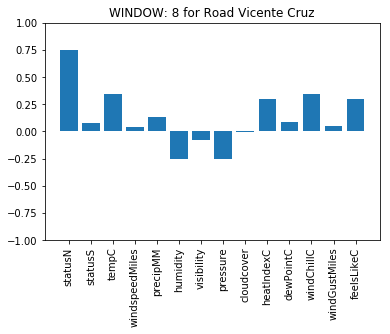

Max for WINDOW 8:0.3457099808573149



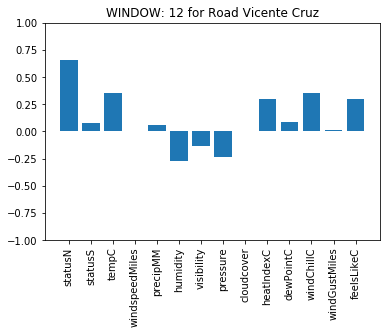

Max for WINDOW 12:0.3540594592074379



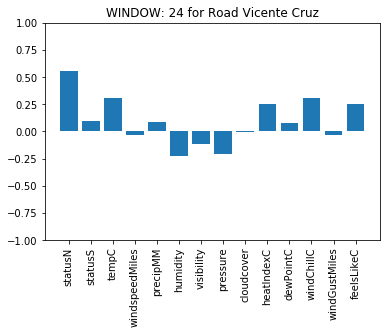

Max for WINDOW 24:0.3078388775530955



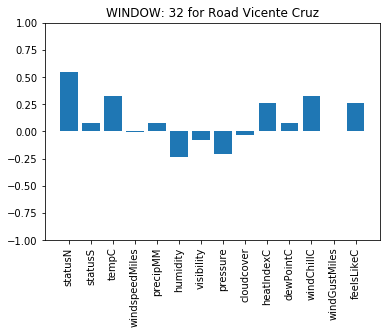

Max for WINDOW 32:0.3221279816429212



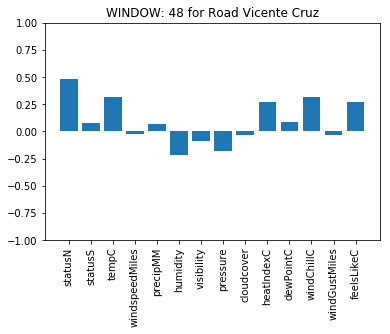

Max for WINDOW 48:0.31519948956786425



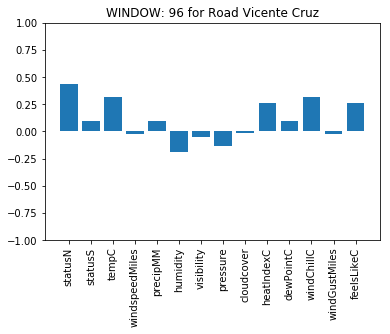

Max for WINDOW 96:0.3193714977525555
Max: 0.3540594592074379
Found in Window: 12


In [24]:
r = 18

maxes = []

fig, ax = plt.subplots()
yGroup = []
fin = False
for w in range(len(WINDOWS)): 
    y = []
    for f in range(3, len(ROADS_NB_CR[r].columns)):
        if f not in rMean[w]:
            continue
        y.append(ROADS_NB_CR[r].iloc[0, f])
    print()
    plt.bar(FEATURES[1:], y)
    plt.xticks(rotation='vertical')
    plt.ylim(ymin=-1, ymax=1)
    plt.title("WINDOW: " + str(WINDOWS[w]) + " for Road " + ROADS_1[r])    
    plt.show()
        
    print("Max for WINDOW " + str(WINDOWS[w]) + ":" + str(np.absolute(y[2:]).max()))
    maxes.append(np.absolute(y[2:]).max())
    
print("===============")
print("Max: " + str(np.amax(maxes)))
print("Found in Window: " + str(WINDOWS[np.argmax(maxes)]))

#### One Graph = One Feature of All Roads for Window w

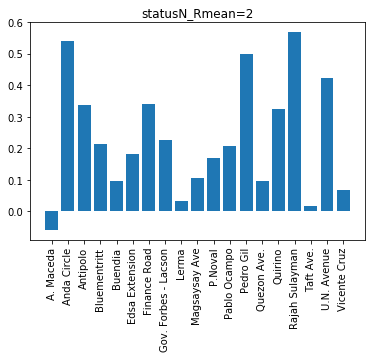

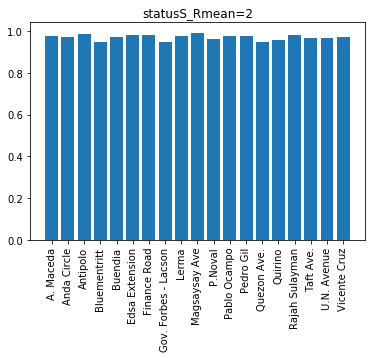

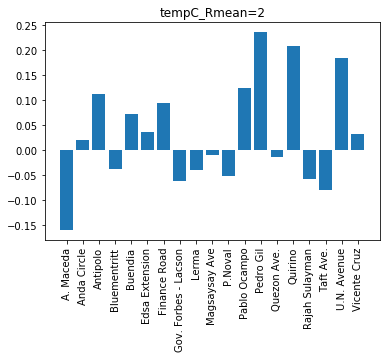

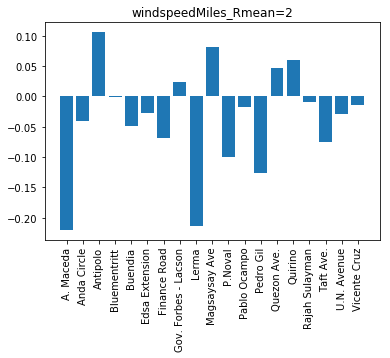

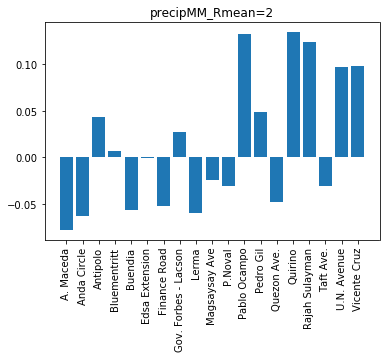

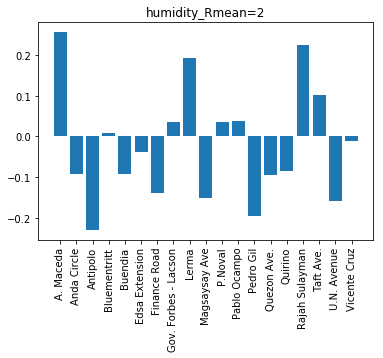

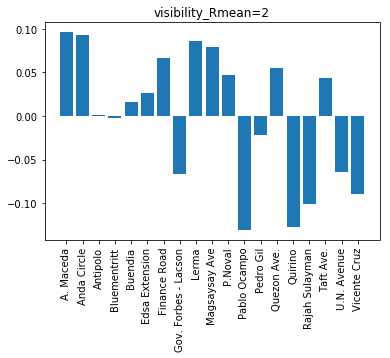

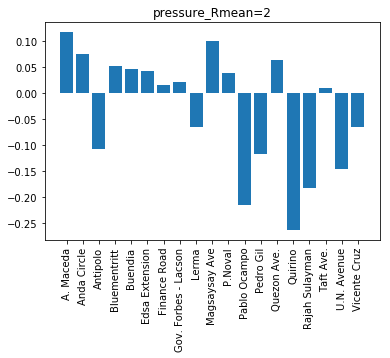

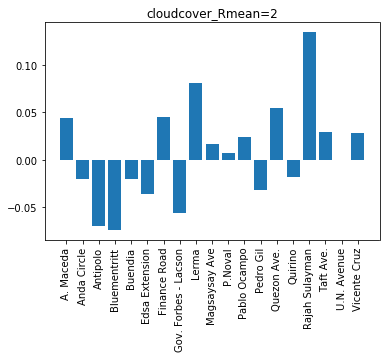

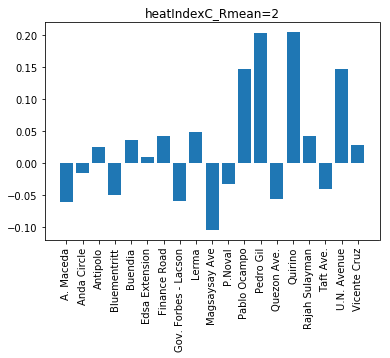

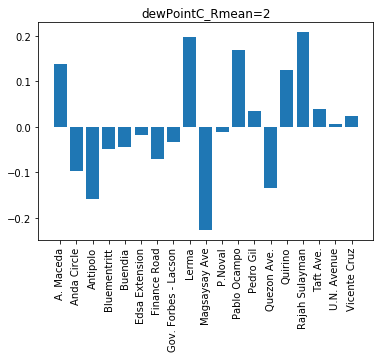

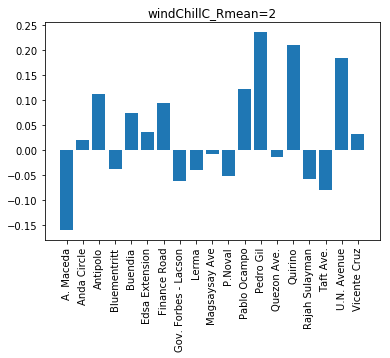

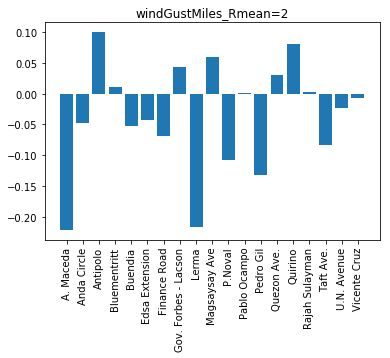

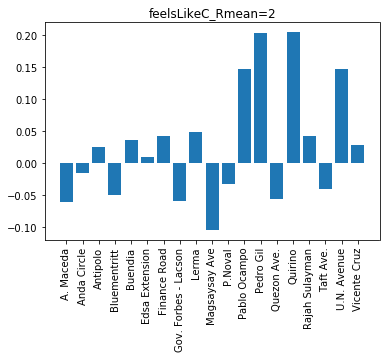

In [25]:
# for W=1
w = 0
r = 0
    
for f in range(3, len(ROADS_NB_CR[0].columns)): 
    y = []
    if f not in rMean[w]:
        continue
    for r in ROADS_SB_CR:
        y.append(r.iloc[0, f])
    plt.bar(ROADS_1, y)
    plt.xticks(rotation='vertical')
    plt.title(ROADS_NB_CR[0].columns[f])
    plt.show()

#### One Graph = One Feature for all Windows of all Roads

precipMM for Road: A. Maceda
precipMM_Rmean=2 : 0.13976323627128712 : 71
precipMM_Rmean=3 : 0.20945392688473444 : 107
precipMM_Rmean=4 : 0.0628286707789336 : 143
precipMM_Rmean=8 : 0.11327678463229135 : 179
precipMM_Rmean=12 : 0.05239495655866008 : 215
precipMM_Rmean=24 : 0.14060991115229518 : 251
precipMM_Rmean=32 : 0.12987145021581534 : 287
precipMM_Rmean=48 : 0.13220875851699396 : 323
precipMM_Rmean=96 : 0.19931376764997533 : 359
Max for Road A. Maceda:0.20945392688473444


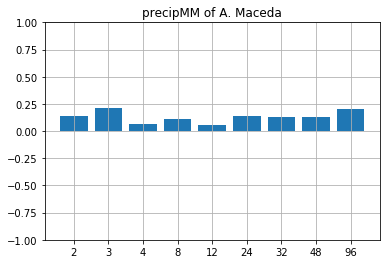

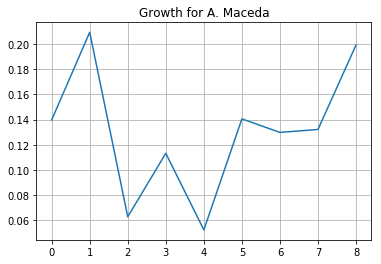

precipMM for Road: Anda Circle
precipMM_Rmean=2 : -0.1350609539085381 : 71
precipMM_Rmean=3 : -0.030594075918258374 : 107
precipMM_Rmean=4 : -0.040196501301380486 : 143
precipMM_Rmean=8 : -0.03908163663689087 : 179
precipMM_Rmean=12 : -0.10691165129170853 : 215
precipMM_Rmean=24 : -0.17256284768407087 : 251
precipMM_Rmean=32 : -0.17324173668290638 : 287
precipMM_Rmean=48 : -0.13385111133493385 : 323
precipMM_Rmean=96 : -0.20163558499655848 : 359
Max for Road Anda Circle:0.20163558499655848


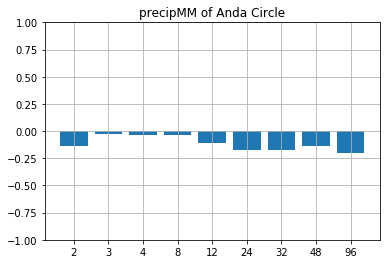

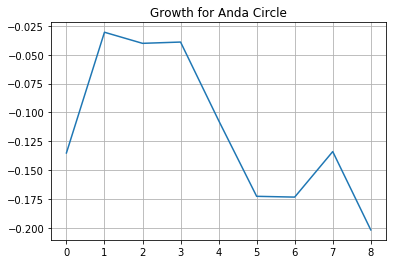

precipMM for Road: Antipolo
precipMM_Rmean=2 : 0.12882090882875835 : 71
precipMM_Rmean=3 : 0.24637618527440786 : 107
precipMM_Rmean=4 : 0.0788975383023372 : 143
precipMM_Rmean=8 : 0.1347754831758539 : 179
precipMM_Rmean=12 : 0.07094600078675306 : 215
precipMM_Rmean=24 : 0.09695256015011172 : 251
precipMM_Rmean=32 : 0.09238871000033096 : 287
precipMM_Rmean=48 : 0.09730270226962418 : 323
precipMM_Rmean=96 : 0.13020094694302142 : 359
Max for Road Antipolo:0.24637618527440786


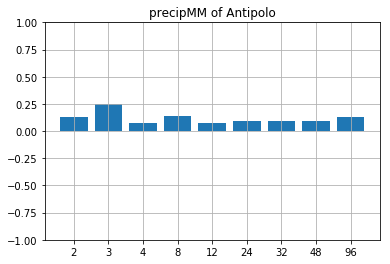

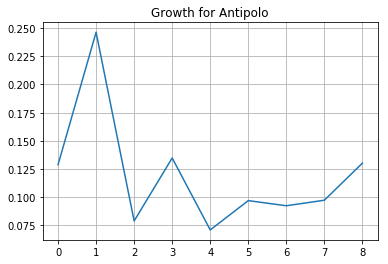

precipMM for Road: Bluementritt
precipMM_Rmean=2 : 0.10582581599733258 : 71
precipMM_Rmean=3 : 0.07754098487059155 : 107
precipMM_Rmean=4 : -0.0013759243070572017 : 143
precipMM_Rmean=8 : 0.0073063500403090405 : 179
precipMM_Rmean=12 : -0.04189706672717527 : 215
precipMM_Rmean=24 : 0.08799296533007682 : 251
precipMM_Rmean=32 : 0.08124150837835613 : 287
precipMM_Rmean=48 : 0.053573347862244616 : 323
precipMM_Rmean=96 : 0.14039455728632347 : 359
Max for Road Bluementritt:0.14039455728632347


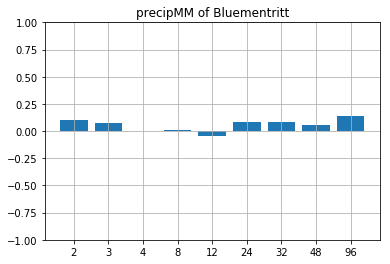

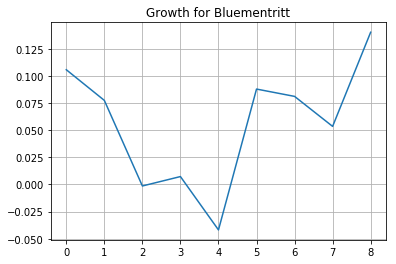

precipMM for Road: Buendia
precipMM_Rmean=2 : 0.015651148557398718 : 71
precipMM_Rmean=3 : 0.0473653565065527 : 107
precipMM_Rmean=4 : 0.041372751362609074 : 143
precipMM_Rmean=8 : 0.08566419937934136 : 179
precipMM_Rmean=12 : 0.09648819668926717 : 215
precipMM_Rmean=24 : 0.018824458689973584 : 251
precipMM_Rmean=32 : 0.0014330384861103516 : 287
precipMM_Rmean=48 : 0.02653655974347058 : 323
precipMM_Rmean=96 : 0.011296814915362458 : 359
Max for Road Buendia:0.09648819668926717


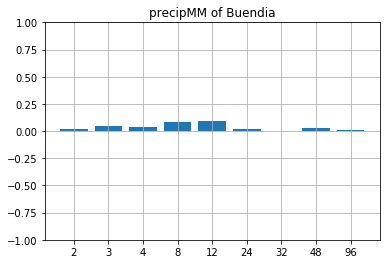

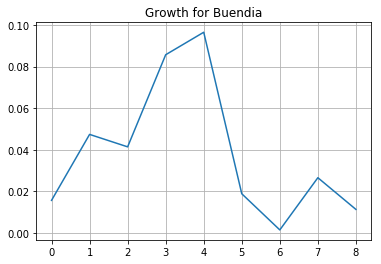

precipMM for Road: Edsa Extension
precipMM_Rmean=2 : -0.04563390884234466 : 71
precipMM_Rmean=3 : -0.07546482303028702 : 107
precipMM_Rmean=4 : -0.06487556861868253 : 143
precipMM_Rmean=8 : -0.04871964906738283 : 179
precipMM_Rmean=12 : -0.018769123002318536 : 215
precipMM_Rmean=24 : 0.005619377513126627 : 251
precipMM_Rmean=32 : 0.024959995474641825 : 287
precipMM_Rmean=48 : 0.0499114053569883 : 323
precipMM_Rmean=96 : 0.05178900208693072 : 359
Max for Road Edsa Extension:0.07546482303028702


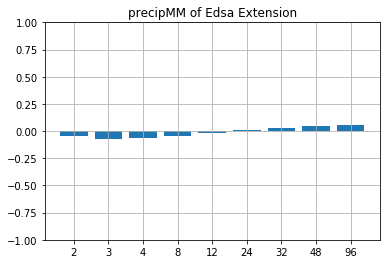

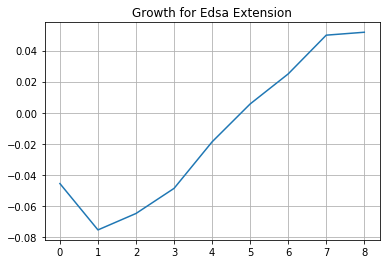

precipMM for Road: Finance Road
precipMM_Rmean=2 : 0.15028938456580498 : 71
precipMM_Rmean=3 : 0.1203221077296238 : 107
precipMM_Rmean=4 : 0.039611001878988535 : 143
precipMM_Rmean=8 : 0.1500973302681682 : 179
precipMM_Rmean=12 : 0.1944654458711441 : 215
precipMM_Rmean=24 : 0.2871310159978642 : 251
precipMM_Rmean=32 : 0.2726133308245113 : 287
precipMM_Rmean=48 : 0.26449710879378463 : 323
precipMM_Rmean=96 : 0.2847160213077073 : 359
Max for Road Finance Road:0.2871310159978642


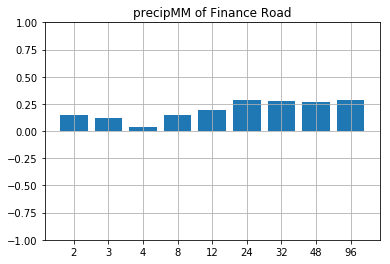

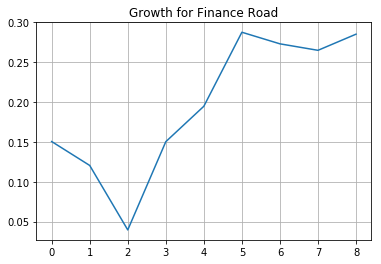

precipMM for Road: Gov. Forbes - Lacson
precipMM_Rmean=2 : 0.14386999014485846 : 71
precipMM_Rmean=3 : 0.25869732144776264 : 107
precipMM_Rmean=4 : 0.12966605883152724 : 143
precipMM_Rmean=8 : 0.1457530654444778 : 179
precipMM_Rmean=12 : 0.06237661126114453 : 215
precipMM_Rmean=24 : 0.061057923885364074 : 251
precipMM_Rmean=32 : 0.06013408140641225 : 287
precipMM_Rmean=48 : 0.05755267939020513 : 323
precipMM_Rmean=96 : 0.09398604059909392 : 359
Max for Road Gov. Forbes - Lacson:0.25869732144776264


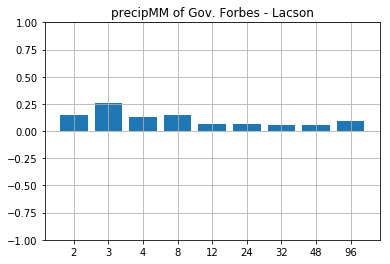

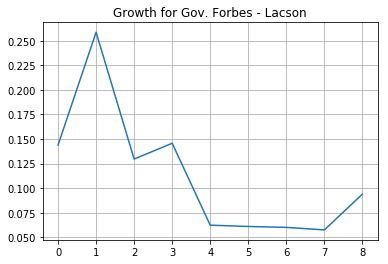

precipMM for Road: Lerma
precipMM_Rmean=2 : -0.04600427086634778 : 71
precipMM_Rmean=3 : 0.047111687087000385 : 107
precipMM_Rmean=4 : -0.009508417553669182 : 143
precipMM_Rmean=8 : 0.005471106402800421 : 179
precipMM_Rmean=12 : -0.02813655909808415 : 215
precipMM_Rmean=24 : -0.0695681777452133 : 251
precipMM_Rmean=32 : -0.06810615498951275 : 287
precipMM_Rmean=48 : -0.011795417919988577 : 323
precipMM_Rmean=96 : 0.0035387083575036467 : 359
Max for Road Lerma:0.0695681777452133


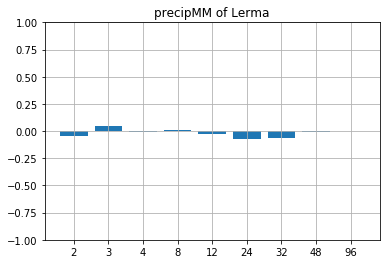

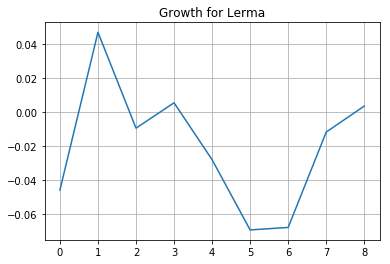

precipMM for Road: Magsaysay Ave
precipMM_Rmean=2 : 0.14948409244999766 : 71
precipMM_Rmean=3 : 0.2663410069289183 : 107
precipMM_Rmean=4 : 0.2036412213911528 : 143
precipMM_Rmean=8 : 0.15482652413252795 : 179
precipMM_Rmean=12 : 0.0980269700995185 : 215
precipMM_Rmean=24 : -0.015575675672145413 : 251
precipMM_Rmean=32 : 0.0038204445273882907 : 287
precipMM_Rmean=48 : 0.06344753535789299 : 323
precipMM_Rmean=96 : -0.021391759265230383 : 359
Max for Road Magsaysay Ave:0.2663410069289183


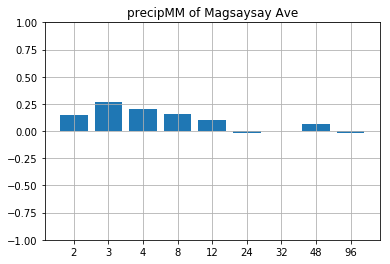

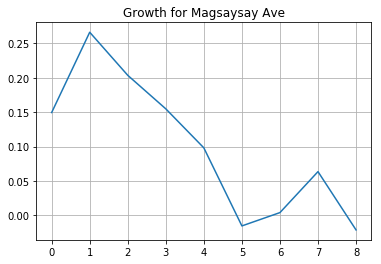

precipMM for Road: P.Noval
precipMM_Rmean=2 : -0.07460391557487951 : 71
precipMM_Rmean=3 : 0.07048657141000976 : 107
precipMM_Rmean=4 : 0.015178627975636459 : 143
precipMM_Rmean=8 : -0.01617308389258579 : 179
precipMM_Rmean=12 : -0.05702069663800365 : 215
precipMM_Rmean=24 : -0.1739795863414317 : 251
precipMM_Rmean=32 : -0.15257966430221495 : 287
precipMM_Rmean=48 : -0.10183639059844864 : 323
precipMM_Rmean=96 : -0.16677232639542205 : 359
Max for Road P.Noval:0.1739795863414317


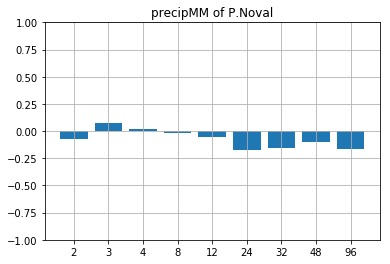

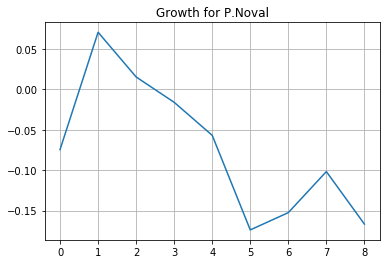

precipMM for Road: Pablo Ocampo
precipMM_Rmean=2 : -0.1376807837243394 : 71
precipMM_Rmean=3 : -0.11833442488428357 : 107
precipMM_Rmean=4 : -0.11118741177629983 : 143
precipMM_Rmean=8 : -0.049515904315282515 : 179
precipMM_Rmean=12 : -0.07342707914069559 : 215
precipMM_Rmean=24 : -0.03116843217130348 : 251
precipMM_Rmean=32 : -0.058760741700070736 : 287
precipMM_Rmean=48 : -0.04386433134355181 : 323
precipMM_Rmean=96 : -0.02271934068487343 : 359
Max for Road Pablo Ocampo:0.1376807837243394


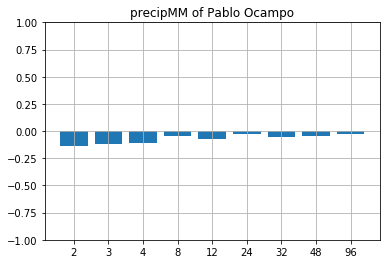

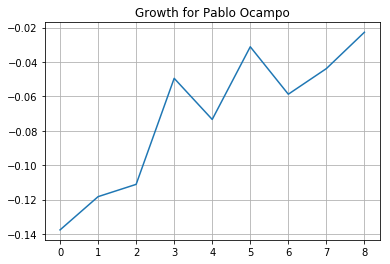

precipMM for Road: Pedro Gil
precipMM_Rmean=2 : -0.02508727357506676 : 71
precipMM_Rmean=3 : 0.13450979710720193 : 107
precipMM_Rmean=4 : 0.07965961130481537 : 143
precipMM_Rmean=8 : 0.0922100074679018 : 179
precipMM_Rmean=12 : 0.06722735766562113 : 215
precipMM_Rmean=24 : -0.06958235312971324 : 251
precipMM_Rmean=32 : -0.06124385000161616 : 287
precipMM_Rmean=48 : 0.032019712468935174 : 323
precipMM_Rmean=96 : -0.04442480117620668 : 359
Max for Road Pedro Gil:0.13450979710720193


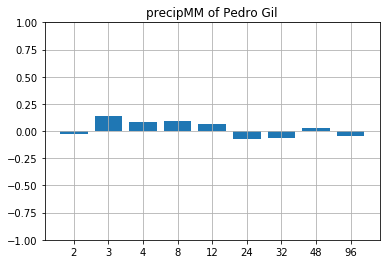

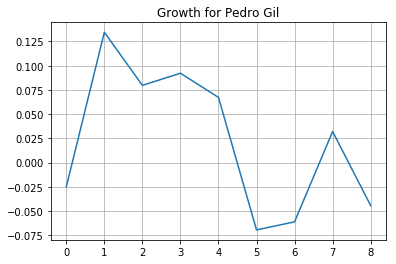

precipMM for Road: Quezon Ave.
precipMM_Rmean=2 : -0.15739829587051155 : 71
precipMM_Rmean=3 : -0.034499684539644894 : 107
precipMM_Rmean=4 : -0.06561454350086371 : 143
precipMM_Rmean=8 : -0.0680685339163696 : 179
precipMM_Rmean=12 : -0.09242214401198252 : 215
precipMM_Rmean=24 : -0.15504557249316914 : 251
precipMM_Rmean=32 : -0.14888546303197858 : 287
precipMM_Rmean=48 : -0.09540928758920968 : 323
precipMM_Rmean=96 : -0.1427263604181205 : 359
Max for Road Quezon Ave.:0.15739829587051155


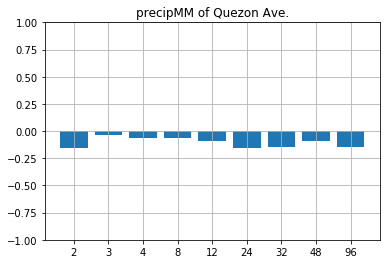

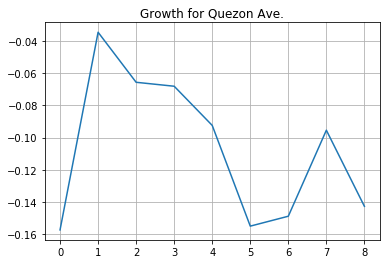

precipMM for Road: Quirino
precipMM_Rmean=2 : 0.020168231701887303 : 71
precipMM_Rmean=3 : 0.05535803302042674 : 107
precipMM_Rmean=4 : 0.023343887730300283 : 143
precipMM_Rmean=8 : 0.0002483685234347744 : 179
precipMM_Rmean=12 : 0.013352322637252691 : 215
precipMM_Rmean=24 : -0.004249805530461103 : 251
precipMM_Rmean=32 : -0.004534481797524318 : 287
precipMM_Rmean=48 : -0.010476589821752194 : 323
precipMM_Rmean=96 : 0.009705305799102157 : 359
Max for Road Quirino:0.05535803302042674


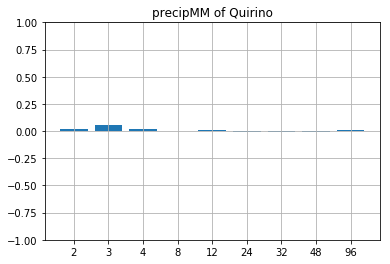

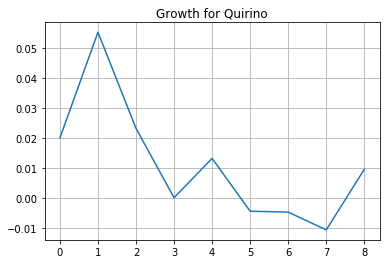

precipMM for Road: Rajah Sulayman
precipMM_Rmean=2 : 0.012591117851962595 : 71
precipMM_Rmean=3 : -0.11593871971334785 : 107
precipMM_Rmean=4 : -0.03035697834799132 : 143
precipMM_Rmean=8 : -0.0354641424625503 : 179
precipMM_Rmean=12 : 0.05836945903609449 : 215
precipMM_Rmean=24 : 0.08460158605324403 : 251
precipMM_Rmean=32 : 0.06278638322620488 : 287
precipMM_Rmean=48 : 0.030726600150464783 : 323
precipMM_Rmean=96 : 0.04517658304695688 : 359
Max for Road Rajah Sulayman:0.11593871971334785


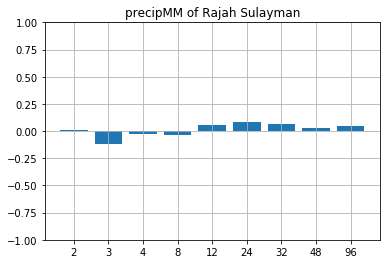

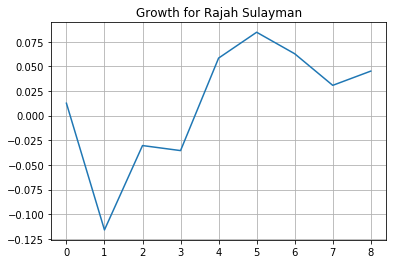

precipMM for Road: Taft Ave.
precipMM_Rmean=2 : 7.824388810784851e-05 : 71
precipMM_Rmean=3 : 0.08533376396499343 : 107
precipMM_Rmean=4 : -0.0002749123714804623 : 143
precipMM_Rmean=8 : 0.06194126846519556 : 179
precipMM_Rmean=12 : 0.04556059052921802 : 215
precipMM_Rmean=24 : -0.02580062500163965 : 251
precipMM_Rmean=32 : -0.03231862638416946 : 287
precipMM_Rmean=48 : 0.022840151120953167 : 323
precipMM_Rmean=96 : 0.03760817909647648 : 359
Max for Road Taft Ave.:0.08533376396499343


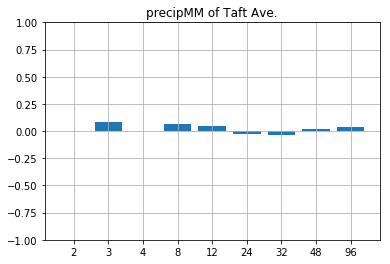

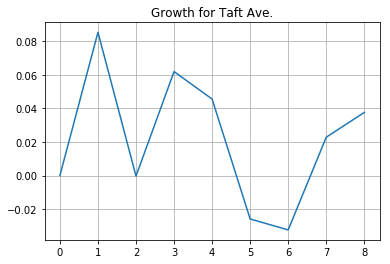

precipMM for Road: U.N. Avenue
precipMM_Rmean=2 : -0.09381622696611687 : 71
precipMM_Rmean=3 : 0.16745086299549627 : 107
precipMM_Rmean=4 : 0.06510657654882915 : 143
precipMM_Rmean=8 : 0.02282314659850731 : 179
precipMM_Rmean=12 : -0.04479904397083352 : 215
precipMM_Rmean=24 : -0.2395046231750843 : 251
precipMM_Rmean=32 : -0.23494779327897045 : 287
precipMM_Rmean=48 : -0.12730977069894905 : 323
precipMM_Rmean=96 : -0.2168517353821044 : 359
Max for Road U.N. Avenue:0.2395046231750843


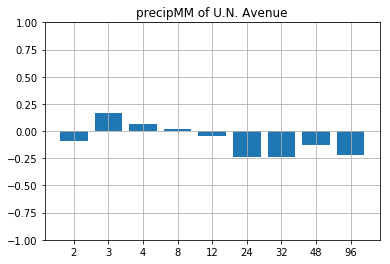

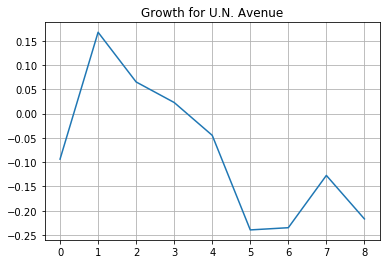

precipMM for Road: Vicente Cruz
precipMM_Rmean=2 : 0.1624461599501451 : 71
precipMM_Rmean=3 : 0.25985276973047844 : 107
precipMM_Rmean=4 : 0.11280291389183265 : 143
precipMM_Rmean=8 : 0.13706190946343305 : 179
precipMM_Rmean=12 : 0.060761092943511626 : 215
precipMM_Rmean=24 : 0.08389216500000307 : 251
precipMM_Rmean=32 : 0.07673294668816226 : 287
precipMM_Rmean=48 : 0.06735338405959453 : 323
precipMM_Rmean=96 : 0.09541894711764724 : 359
Max for Road Vicente Cruz:0.25985276973047844


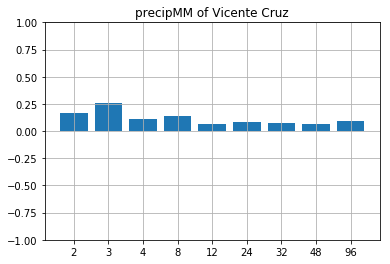

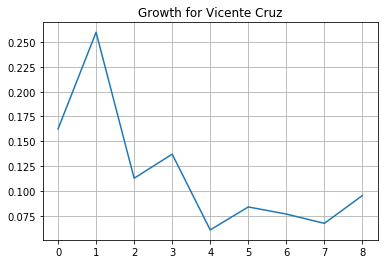

In [26]:
w = 0
r = 0
feature = 'precipMM'
y = []

for r in range(len(ROADS_1)):
    y = []
    print(feature + " for Road: " + ROADS_1[r])
    for w in range(len(WINDOWS)):
        for f in range(3, len(ROADS_NB_CR[r].columns)): 
            if f not in rMean[w]:
                continue
            elif feature not in ROADS_NB_CR[r].columns[f]:
                continue
            print(str(ROADS_NB_CR[r].columns[f]) + " : " + str(ROADS_NB_CR[r].iloc[0, f]) + " : " + str(f))
            y.append(ROADS_NB_CR[r].iloc[0, f])
            
    print("Max for Road " + ROADS_1[r] + ":" + str(np.absolute(y).max()))
    plt.bar(np.arange(len(WINDOWS)), y)
    plt.ylim(ymax=1, ymin=-1)
    plt.xticks(np.arange(len(WINDOWS)), WINDOWS)
    plt.grid()
    plt.title(feature + " of " + ROADS_1[r])
    plt.show()
    
    plt.plot(y)
    plt.grid()
    plt.title("Growth for " + ROADS_1[r])

    plt.show()